# To Predict House Price Using Advanced Regression.

## Domain Analysis

In [1]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn import metrics


import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
#Loading the data
data=pd.read_csv('data.csv')

In [3]:
## Setting the display option
pd.set_option('display.max_columns', None)


## Basic Checks

In [4]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
data.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,NaN,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,6,1965,1965,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,TA,TA,No,BLQ,830,LwQ,290,136,1256,GasA,Gd,Y,SBrkr,1256,0,0,1256,1,0,1,1,3,1,TA,6,Typ,0,NaN,Attchd,1965.0,Fin,1,276,TA,TA,Y,736,68,0,0,0,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [6]:
numerical=data.describe()

In [7]:
len(numerical.columns)

38

In [8]:
numerical.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [9]:
categorical=data.describe(include='O')

In [10]:
len(categorical.columns)

43

In [11]:
categorical.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [12]:
data.shape

(1460, 81)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [14]:
data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [15]:
year_feature=[feature for feature in numerical if 'Yr' in feature or 'Year' in feature]

In [16]:
year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [17]:
discrete=[feature for feature in numerical if len(data[feature].unique())<30 and feature not in year_feature+['Id']]

In [18]:
len(discrete)

17

In [19]:
continuous=[feature for feature in numerical if feature not in discrete and feature not in year_feature+['Id']]

In [20]:
len(continuous)

16

In [21]:
## Categorical Values
for feature in categorical:
    print("{} as value {}".format(feature,data[feature].unique()))

MSZoning as value ['RL' 'RM' 'C (all)' 'FV' 'RH']
Street as value ['Pave' 'Grvl']
Alley as value [nan 'Grvl' 'Pave']
LotShape as value ['Reg' 'IR1' 'IR2' 'IR3']
LandContour as value ['Lvl' 'Bnk' 'Low' 'HLS']
Utilities as value ['AllPub' 'NoSeWa']
LotConfig as value ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope as value ['Gtl' 'Mod' 'Sev']
Neighborhood as value ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1 as value ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2 as value ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
BldgType as value ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle as value ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
RoofStyle as value ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' '

In [22]:
missing=data.columns[data.isnull().any()]

In [23]:
len(missing)

19

In [24]:
for feature in missing:
    if feature in categorical:
        print("Categorical-",feature,"-",data[feature].isnull().sum()," missing values")
    elif feature in discrete:
        print("Discrete-",feature,"-",data[feature].isnull().sum()," missing values")
    elif feature in continuous:
        print("Continuous-",feature,"-",data[feature].isnull().sum()," missing values")
    else:
        print("Year-",feature,"-",data[feature].isnull().sum()," missing values")
    

Continuous- LotFrontage - 259  missing values
Categorical- Alley - 1369  missing values
Categorical- MasVnrType - 8  missing values
Continuous- MasVnrArea - 8  missing values
Categorical- BsmtQual - 37  missing values
Categorical- BsmtCond - 37  missing values
Categorical- BsmtExposure - 38  missing values
Categorical- BsmtFinType1 - 37  missing values
Categorical- BsmtFinType2 - 38  missing values
Categorical- Electrical - 1  missing values
Categorical- FireplaceQu - 690  missing values
Categorical- GarageType - 81  missing values
Year- GarageYrBlt - 81  missing values
Categorical- GarageFinish - 81  missing values
Categorical- GarageQual - 81  missing values
Categorical- GarageCond - 81  missing values
Categorical- PoolQC - 1453  missing values
Categorical- Fence - 1179  missing values
Categorical- MiscFeature - 1406  missing values


In [25]:
data.shape

(1460, 81)

### *Observations from Basic Checks
#### 1.There 1460 Rows and 81 Columns
#### 2.The Dataset contains float64(3), int64(35), object(43) data types
#### 3.There are 19 features with null values
#### 4.There are 38 numerical features and 43 categorical features

## Exploratory Data Analysis

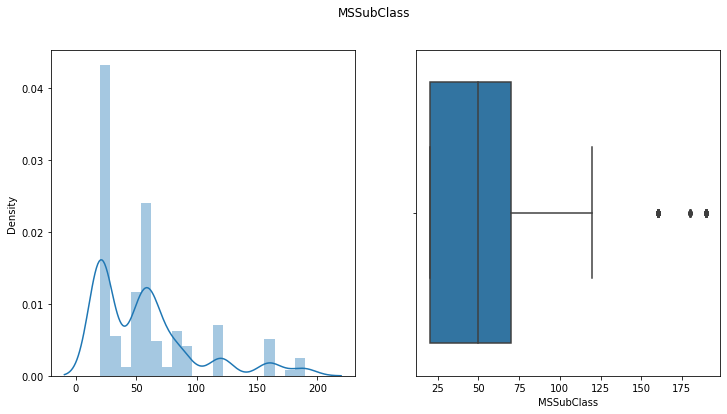

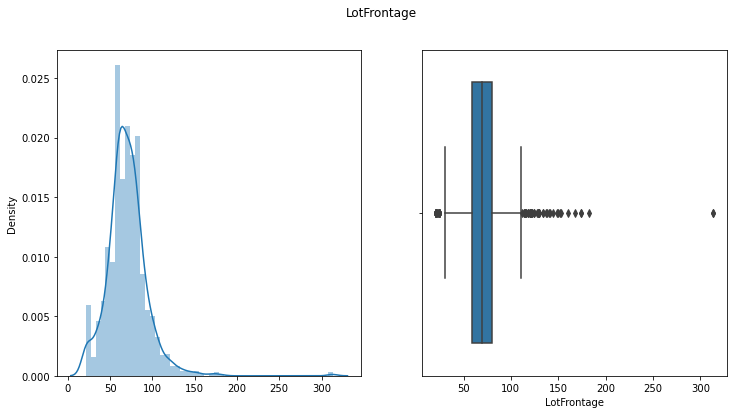

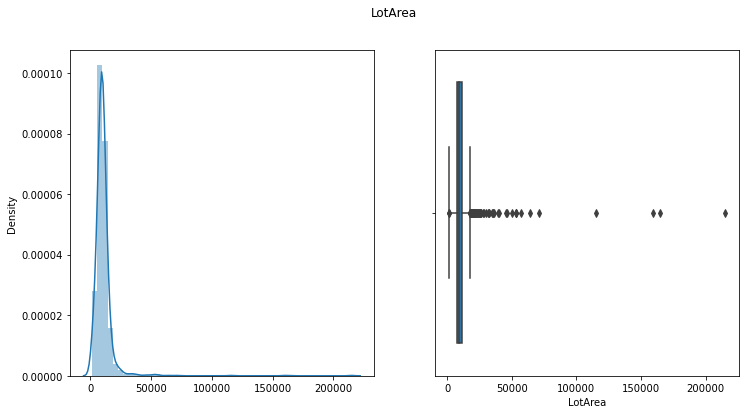

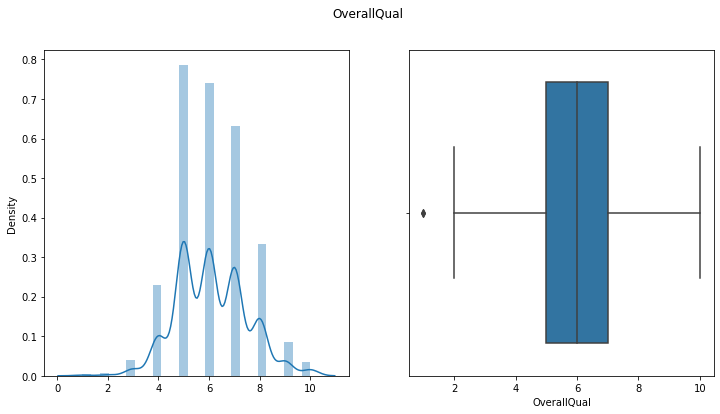

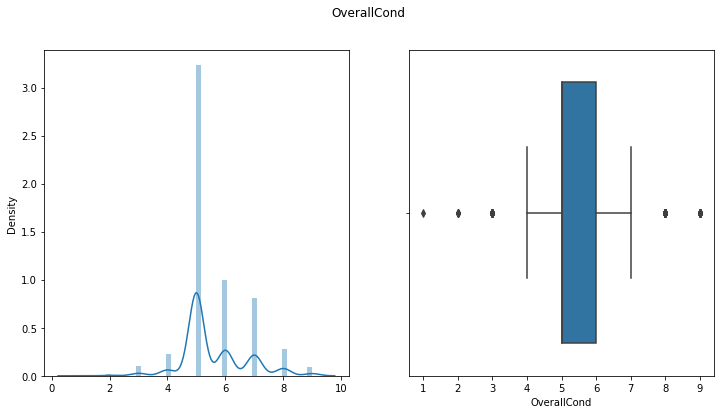

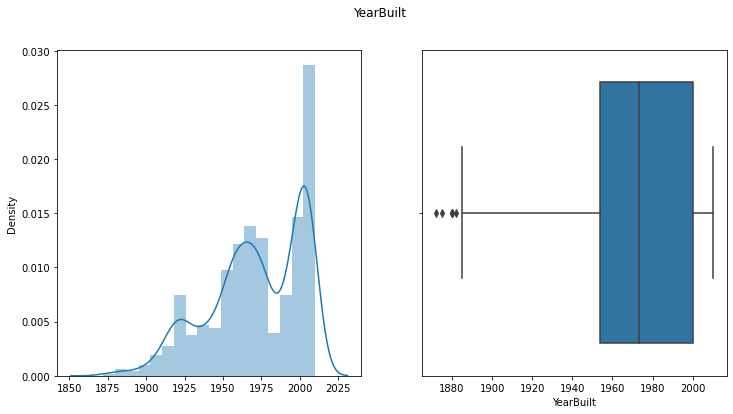

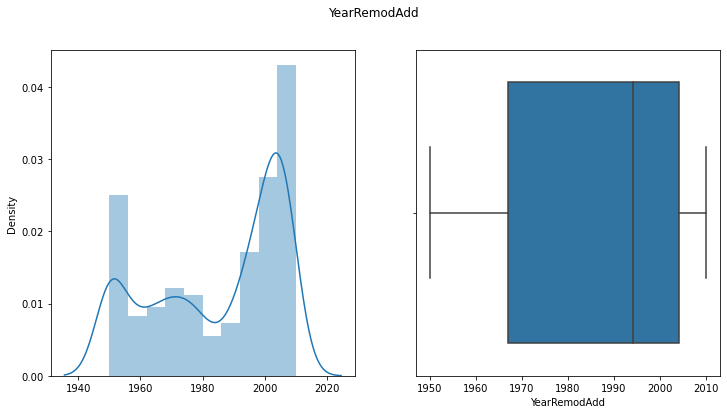

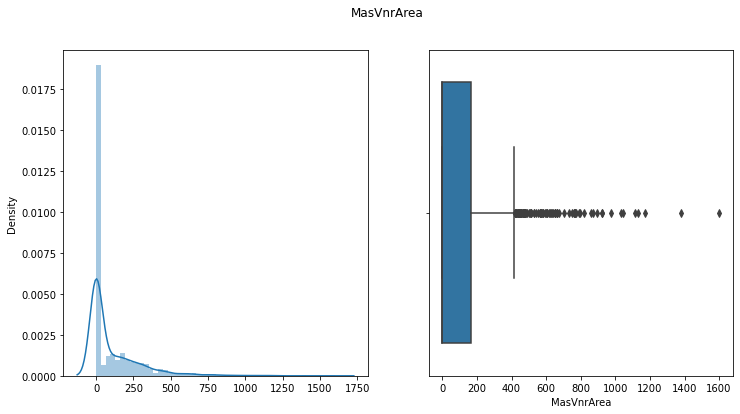

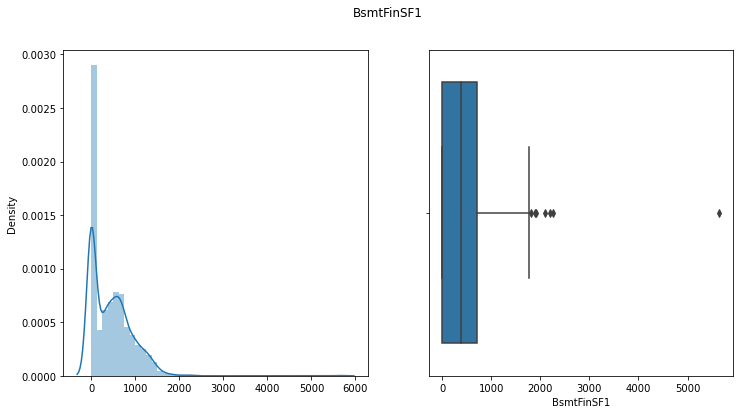

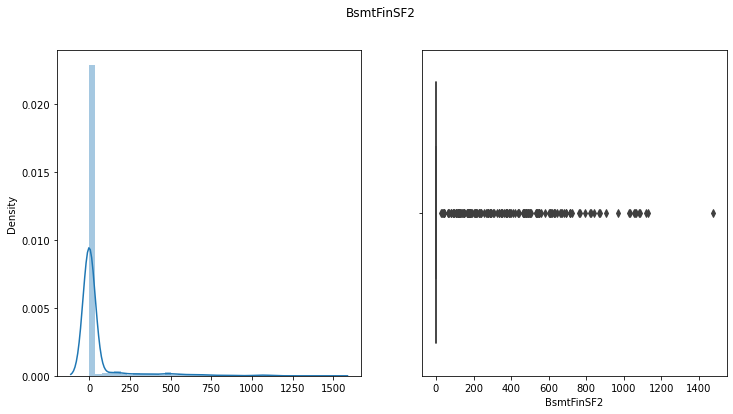

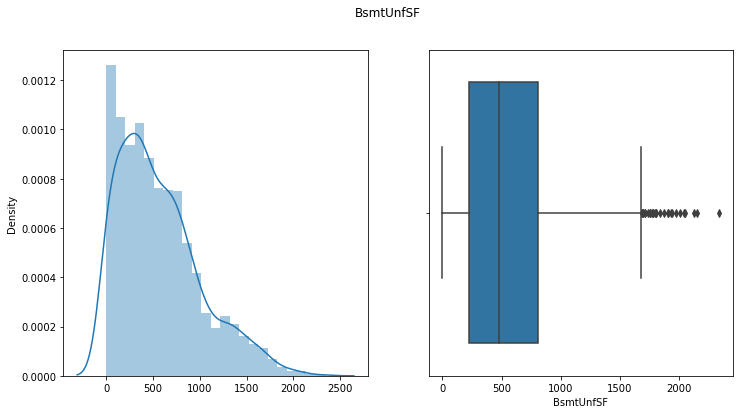

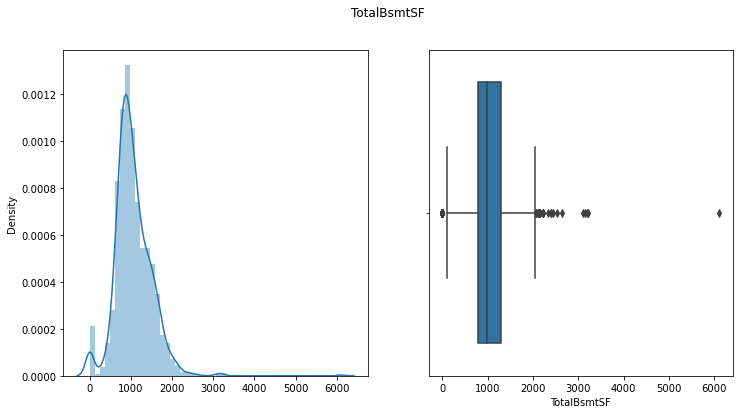

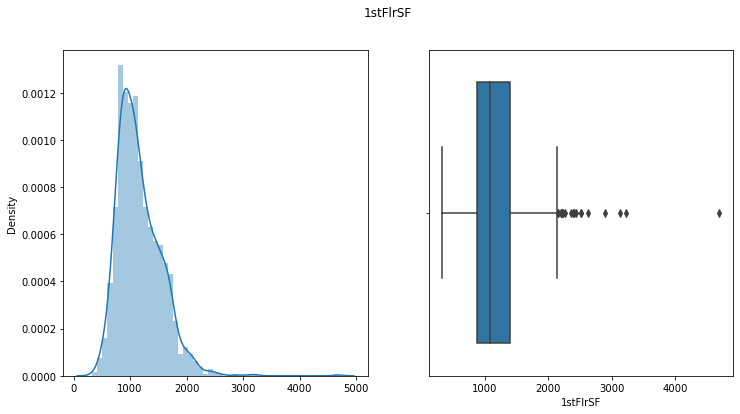

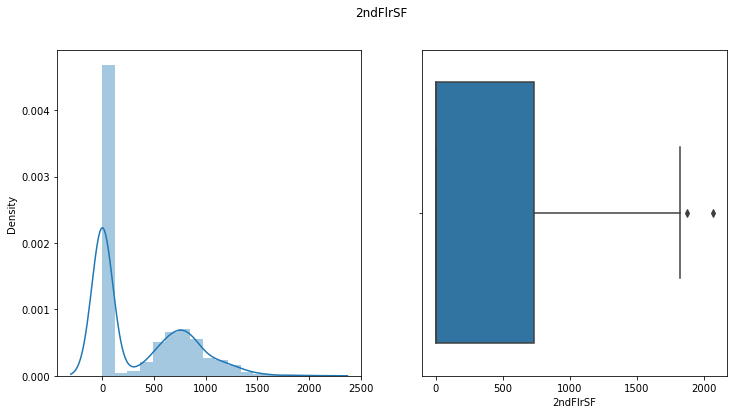

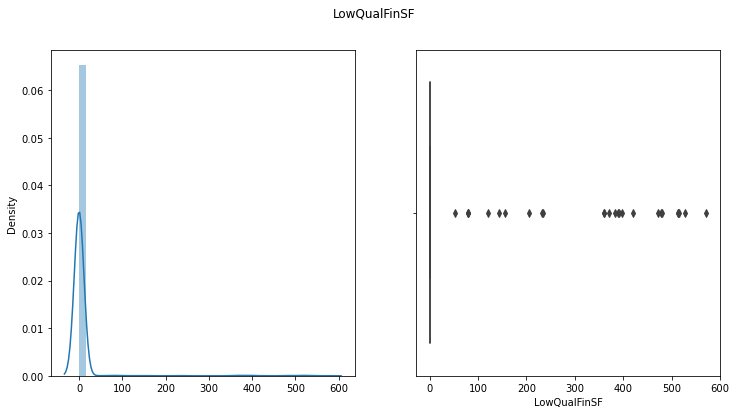

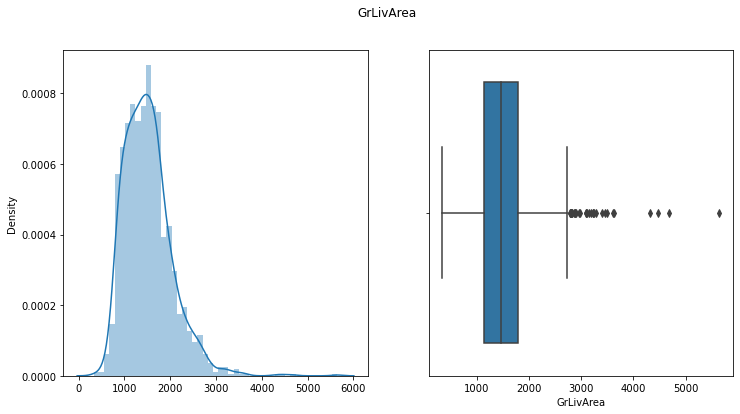

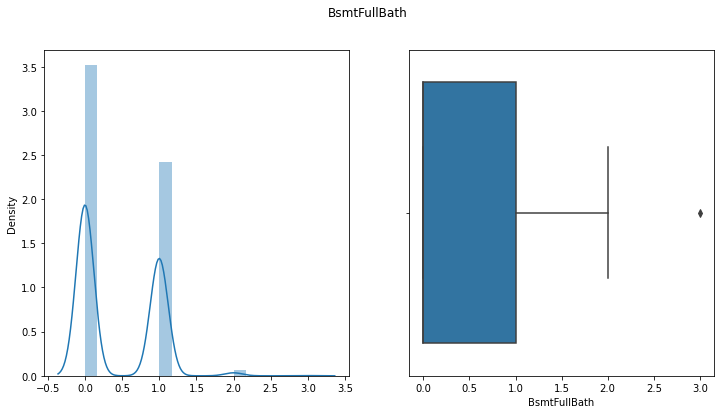

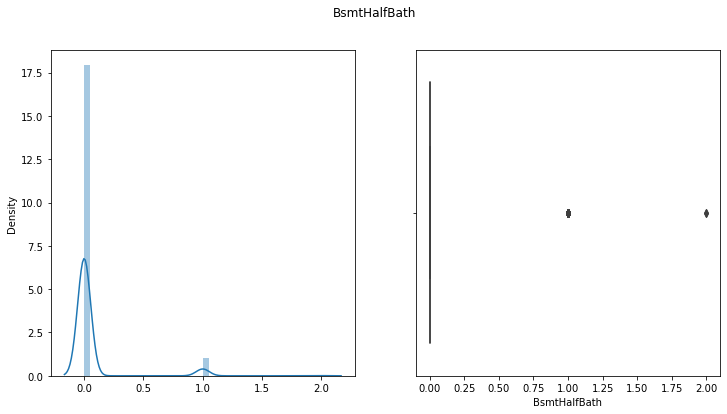

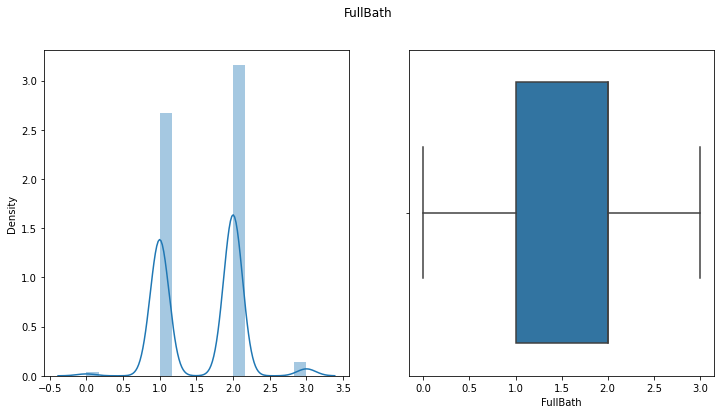

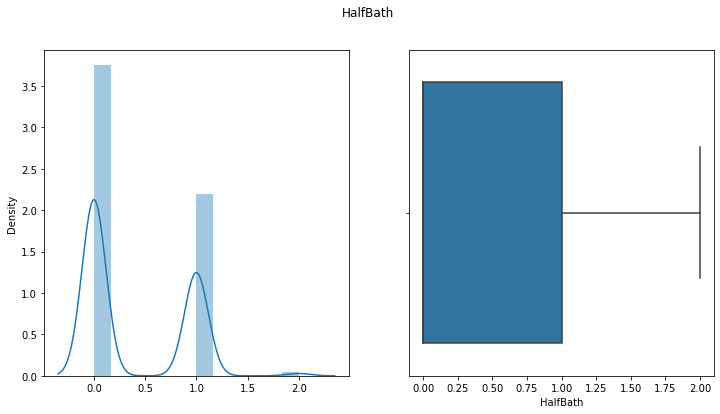

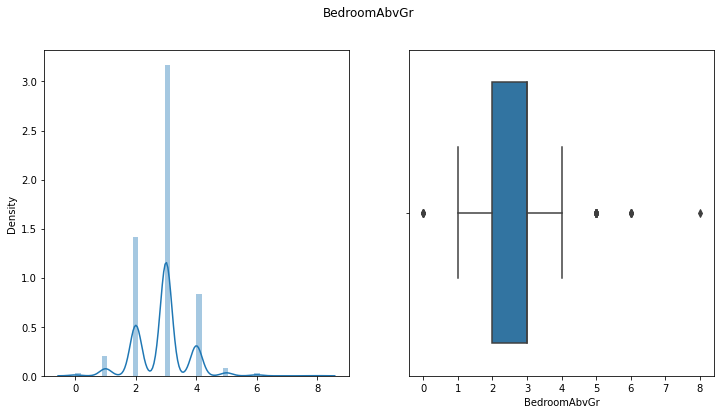

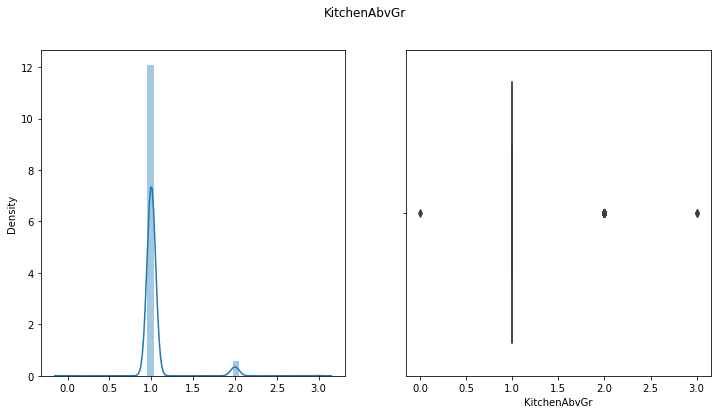

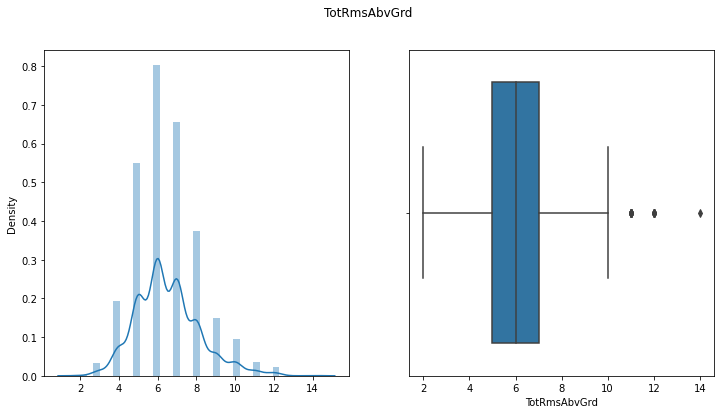

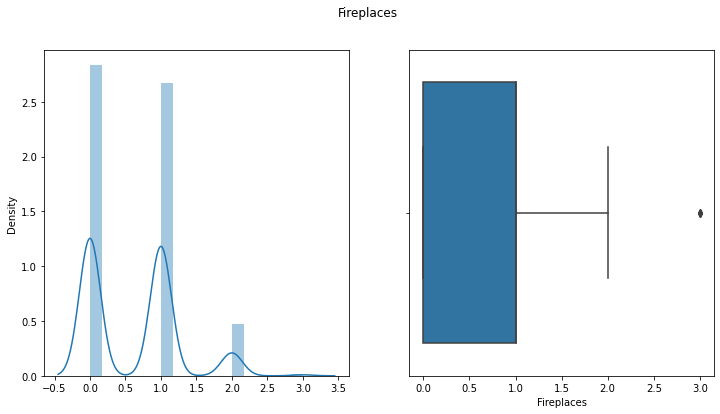

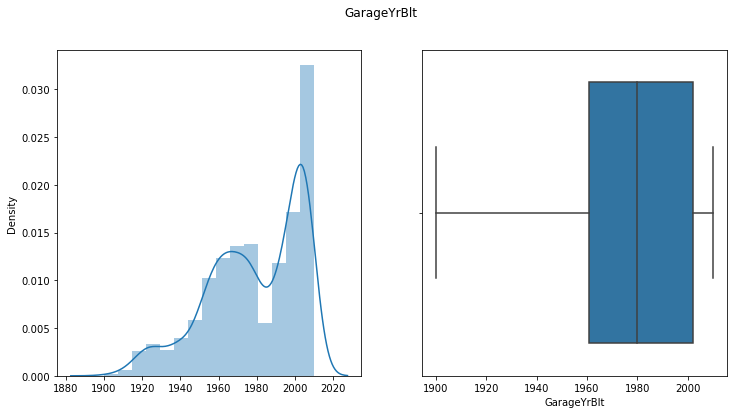

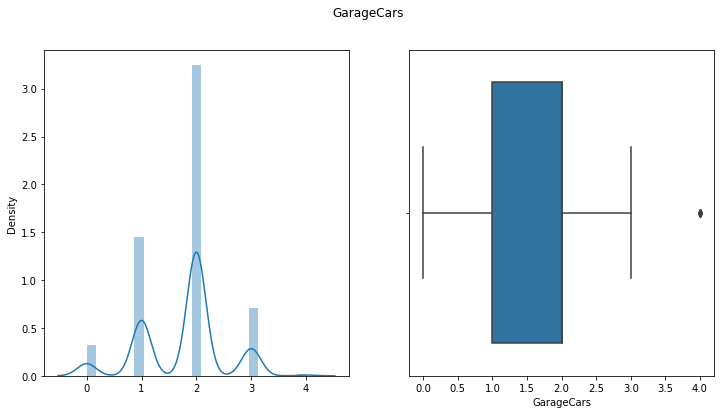

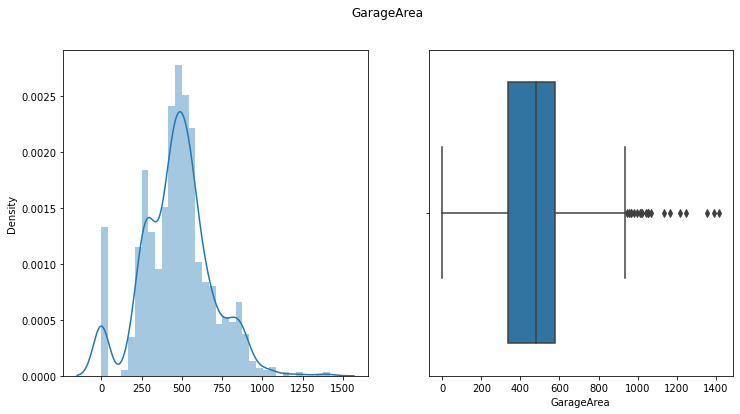

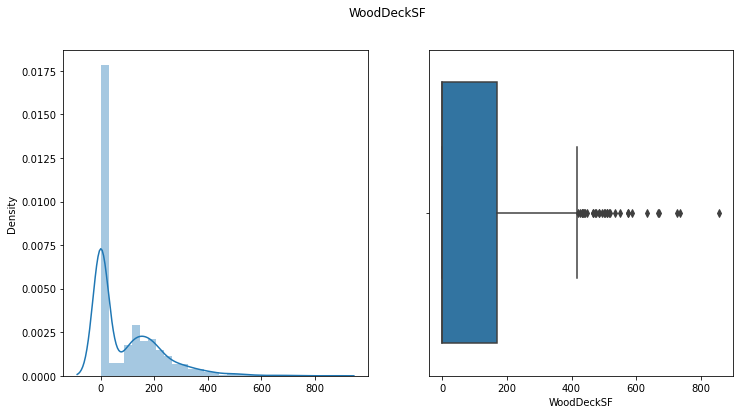

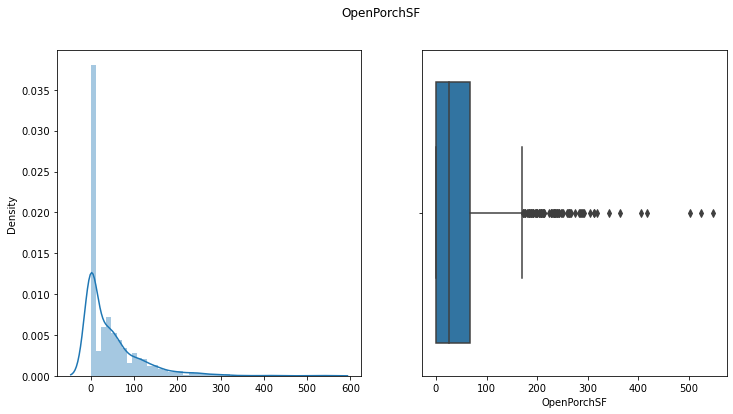

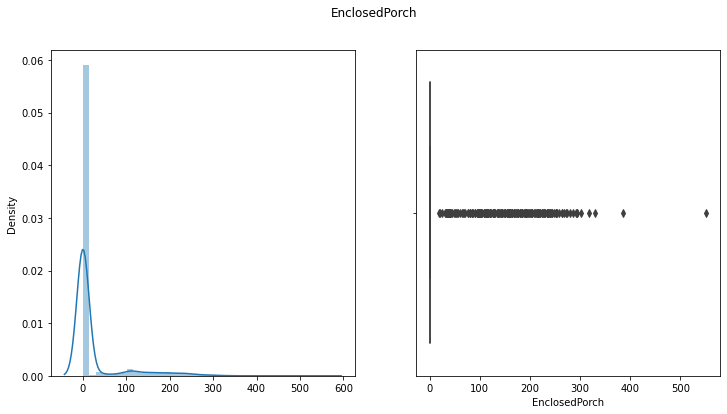

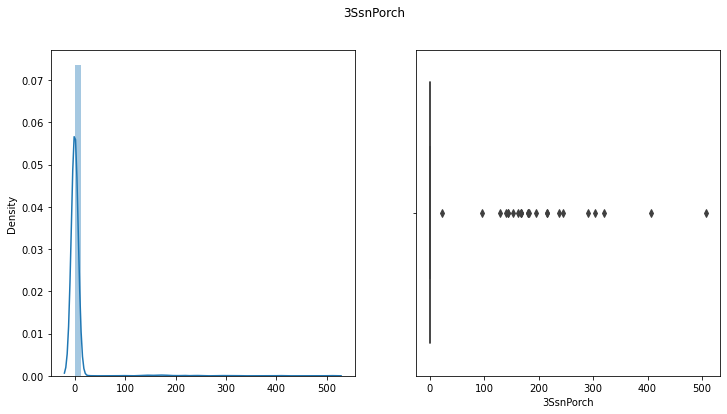

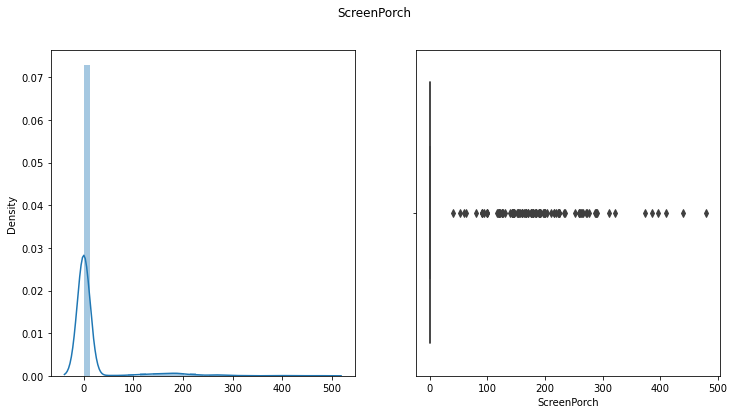

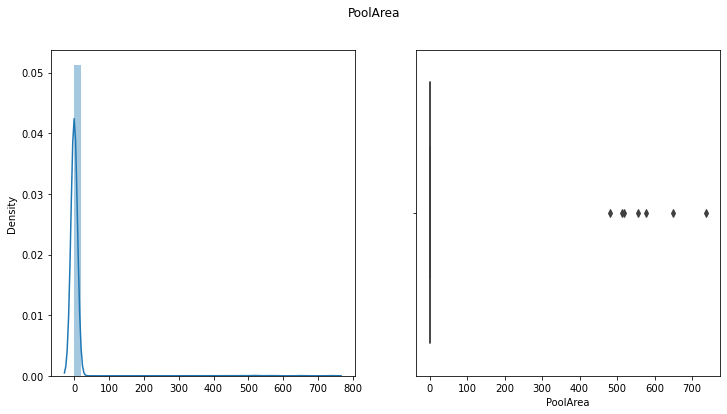

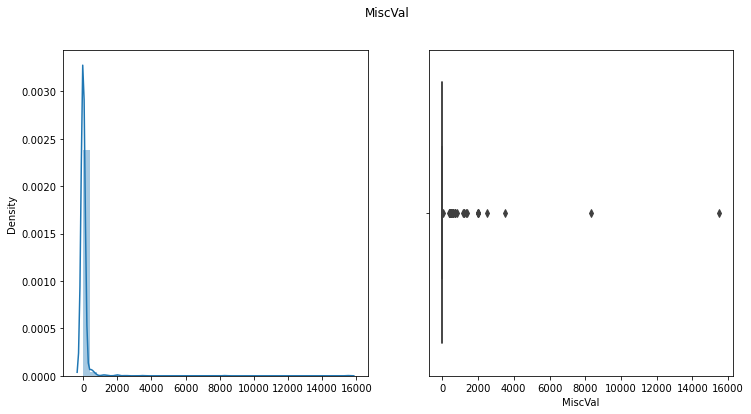

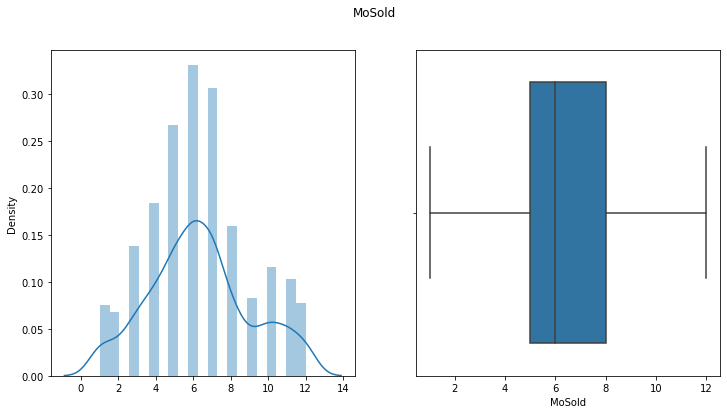

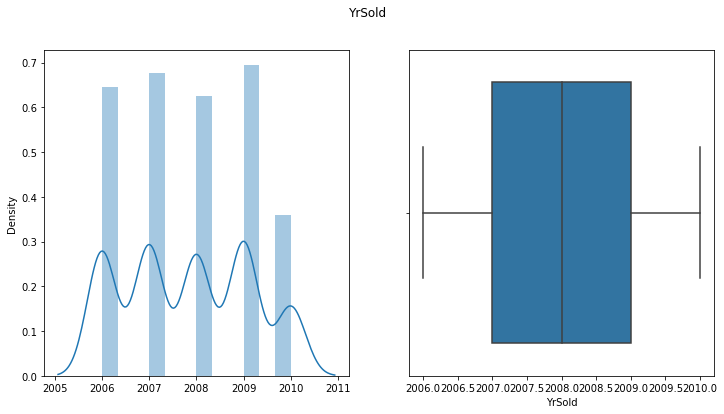

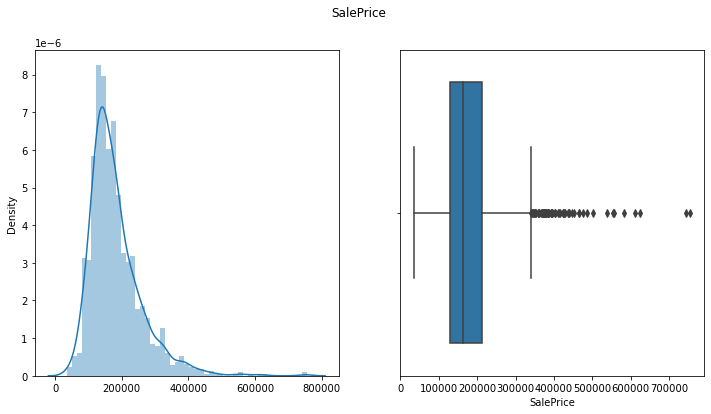

In [26]:
#Step 1 Univariate Analysis

##for feature in n:

for feature in numerical.columns[1:]:
    fig=plt.figure(figsize=(12,6))
    fig.suptitle(feature)
    ax1=plt.subplot(1,2,1)
    sns.distplot(x=data[feature],kde=True,ax=ax1)
    ax2=plt.subplot(1,2,2)
    sns.boxplot(x=data[feature],ax=ax2);

    


### *Observations from the Above Analysis
#### Skewness and Kurtosis present in'BsmtUnfSF','TotalBsmtSF','1stFlrSF','GrLivArea','BsmtFullBath','FullBath','HalfBath','BedroomAbvGr','TotRmsAbvGrd','Fireplaces ,'GarageYrBlt', 'GarageCars','GarageArea','MoSold', 'YrSold' ,So these features can be Transformed in Data Preprocessing.

#### 2.More of Null values in ,'LotArea','MasVnrArea','BsmtFinSF2','LowQualFinSF','WoodDeckSF'

#### 3.More Outliers present in '2ndFlrSF','LowQualFinSF','BsmtHalfBath','KitchenAbvGr','EnclosedPorch','3SsnPorch', 'ScreenPorch', 'PoolArea','MiscVal' ,So these features can be dropped while feature Selection

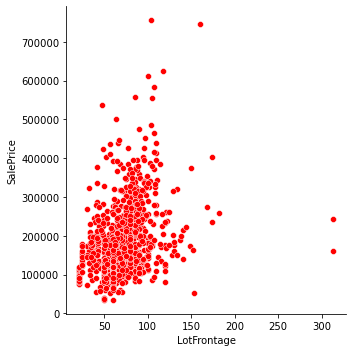

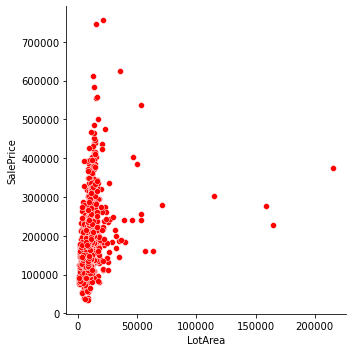

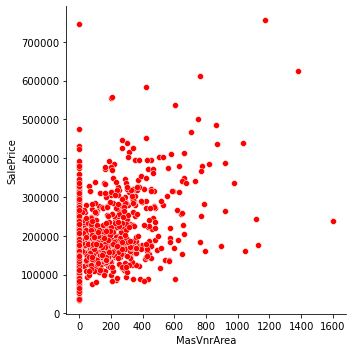

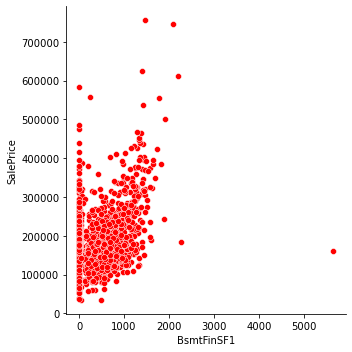

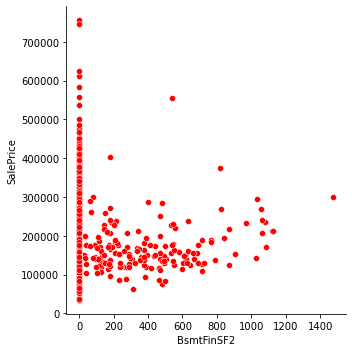

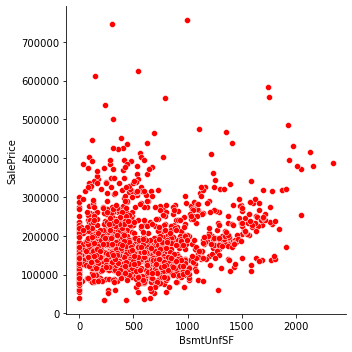

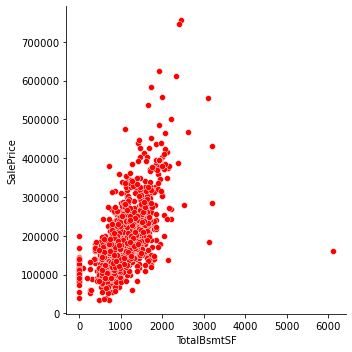

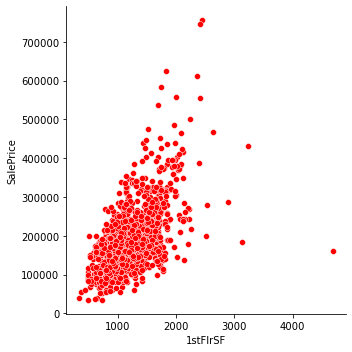

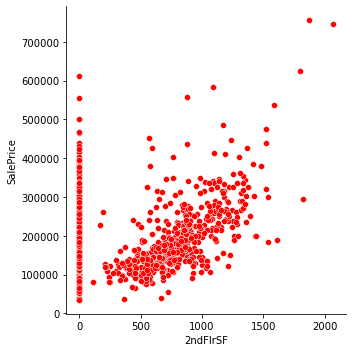

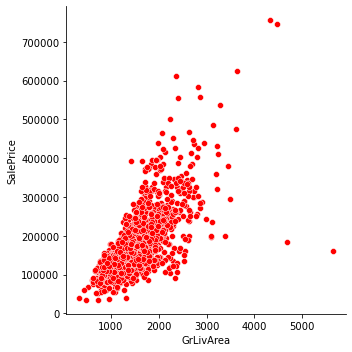

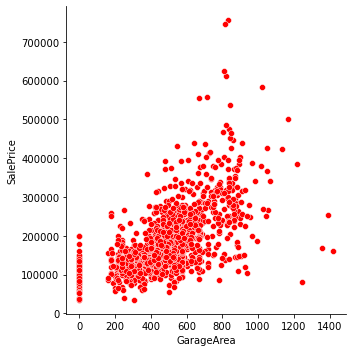

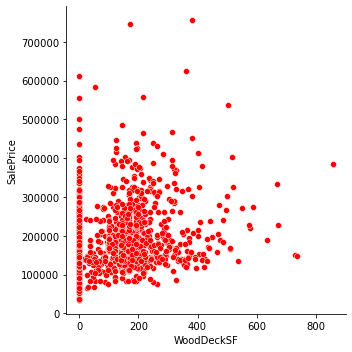

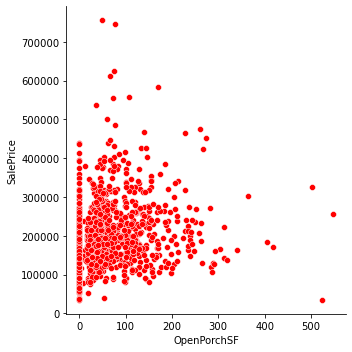

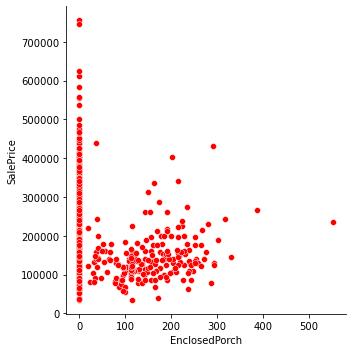

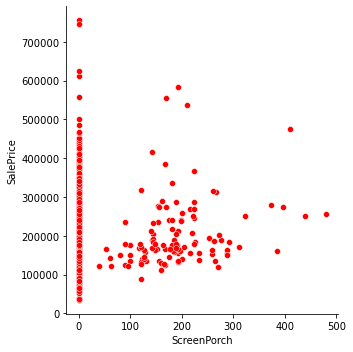

In [27]:
## II Bivariate Analysis to see Relationship bewteen Independent Features and Dependent Feature(Sale Price)
for feature in continuous[:-1]:
    sns.relplot(y='SalePrice',x=data[feature],data=data,color='r')

### *Observations from the Above Analysis
#### 1..Mostly the relationship between independent and dependent feature is more concentrate at few points ,there is slight increase in Sale price as  '2ndFlrSF','GarageArea','BsmtUnfSF' increases.

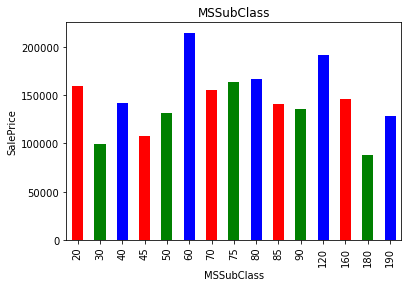

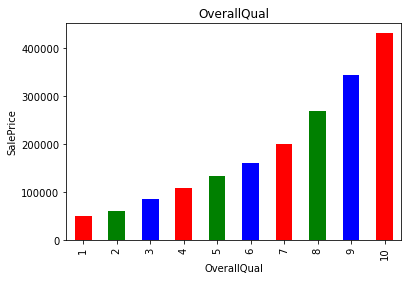

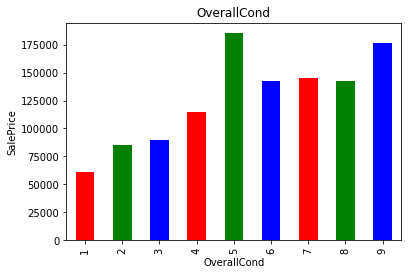

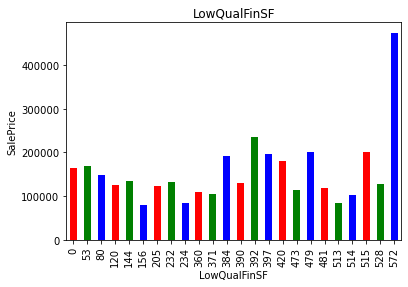

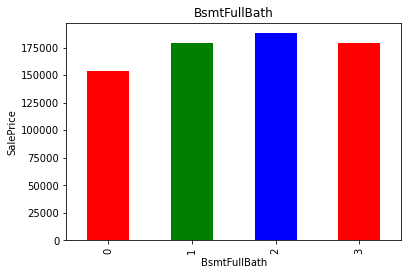

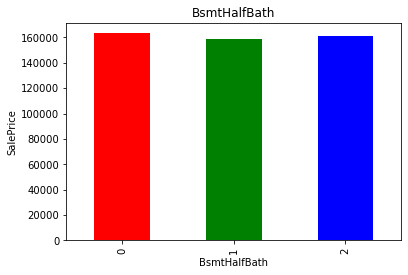

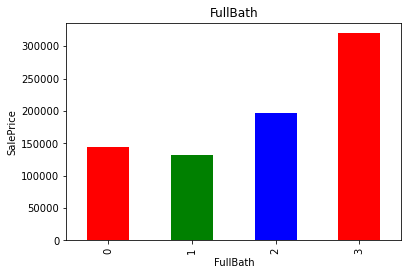

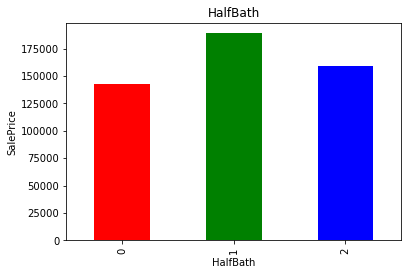

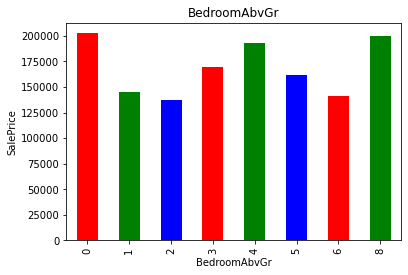

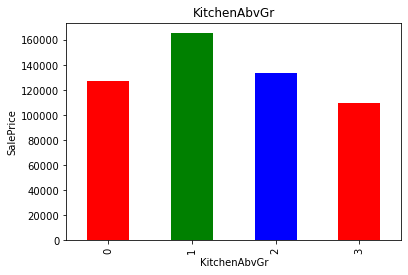

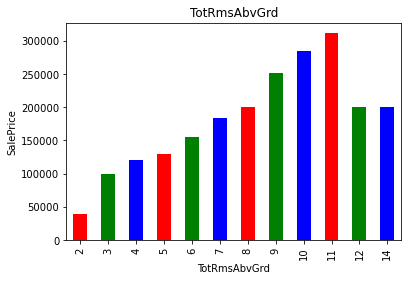

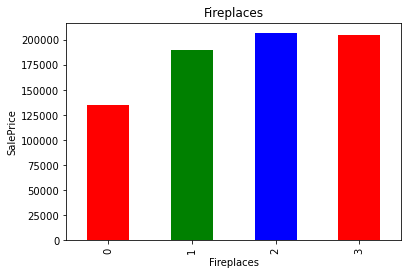

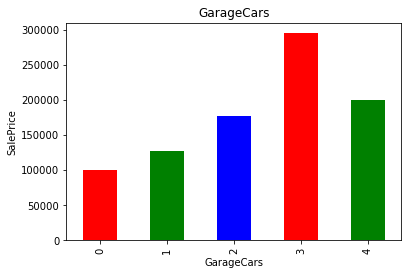

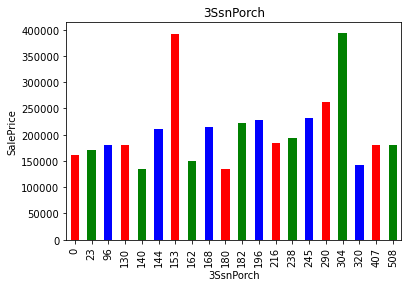

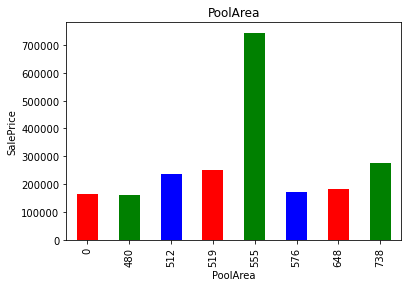

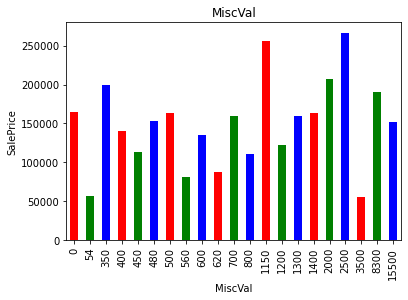

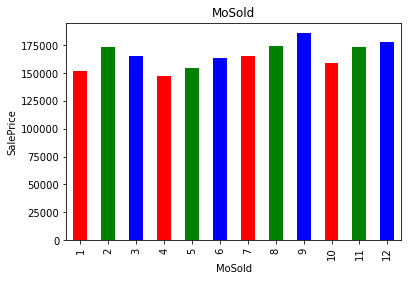

In [28]:
## Relationship between Discrete Variables and Target Variable('Sales Price')

for feature in discrete:
    d=data.copy()
    d.groupby(feature)['SalePrice'].median().plot.bar(color=['r','g','b'])
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

### *Observations from the Above Analysis
#### 1.As the Value of overall Condition increases Sales Price increases discrete features have monotonic relations with the Traget variable.
#### 2.Month of September had the highest sales price.
#### 3.Pool Area with value 555 had the highest sales price.
#### 4.Garage with capacity of 3 cars had the highest sales price.
#### 5.Overall Condition with value 10 had the highest sales price.

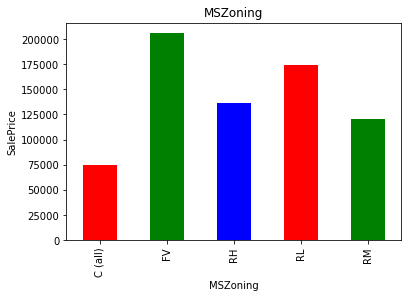

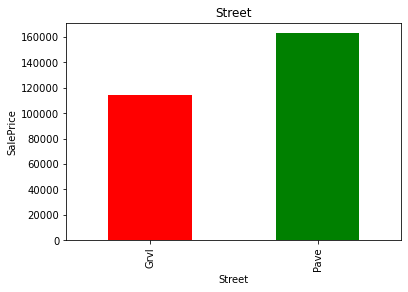

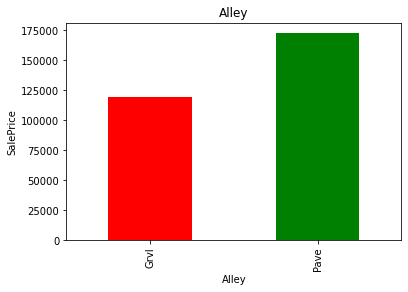

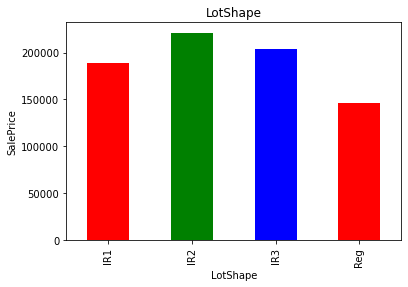

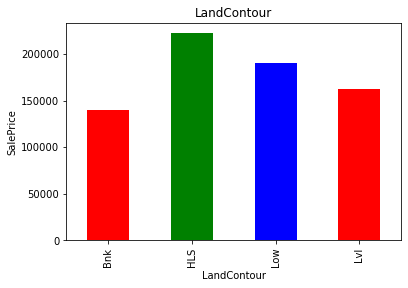

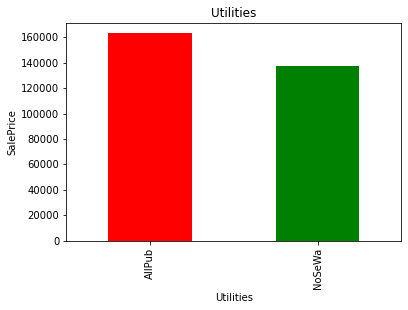

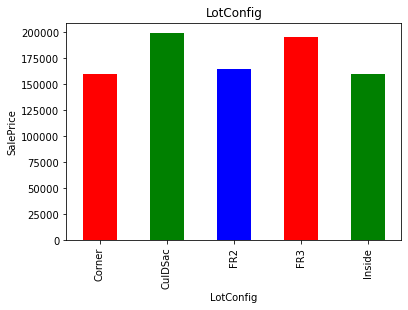

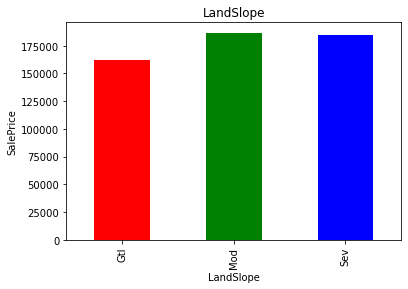

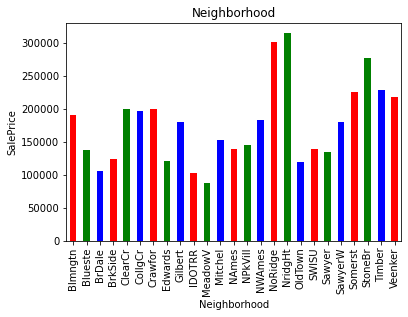

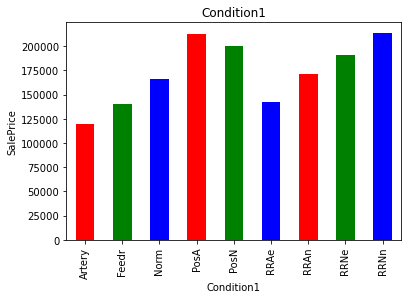

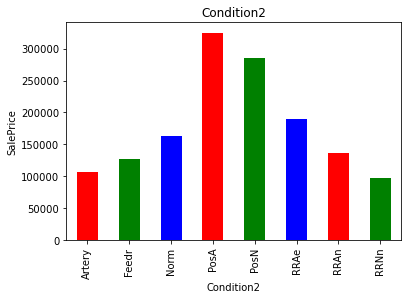

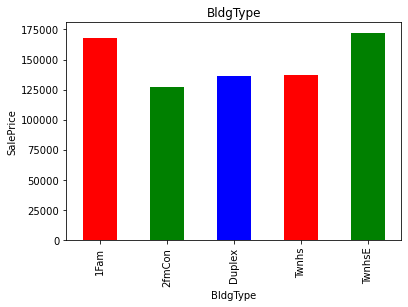

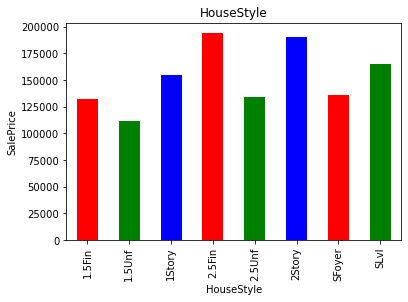

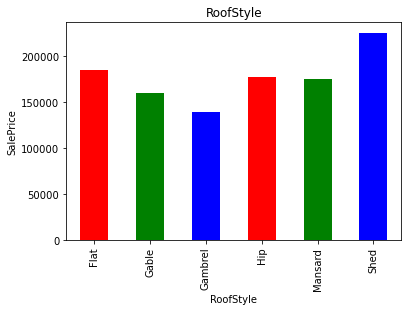

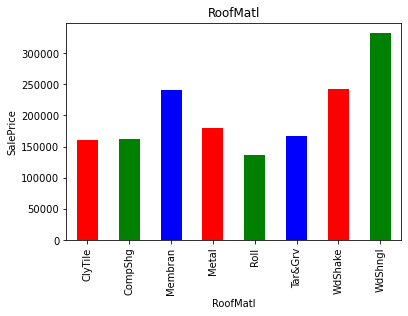

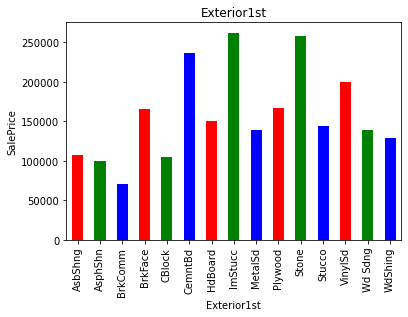

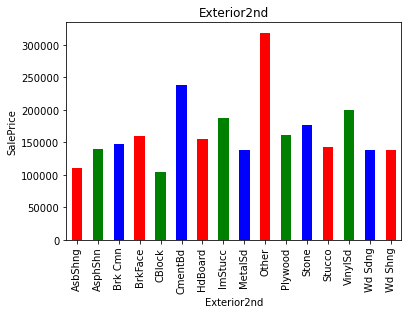

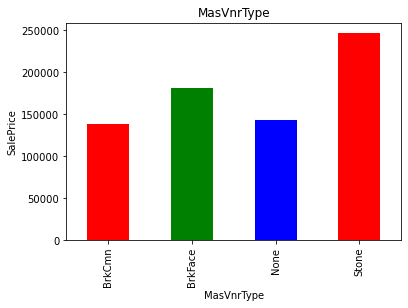

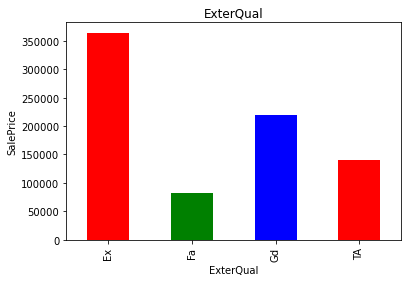

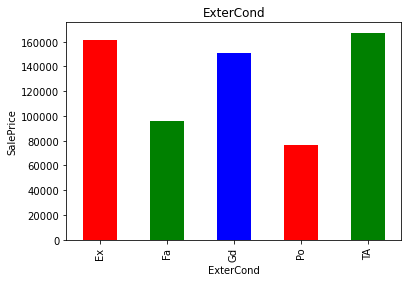

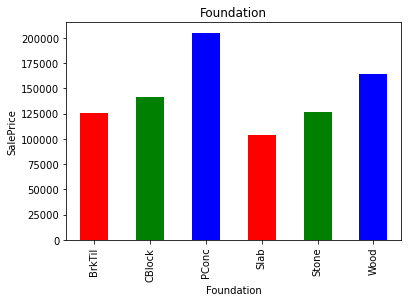

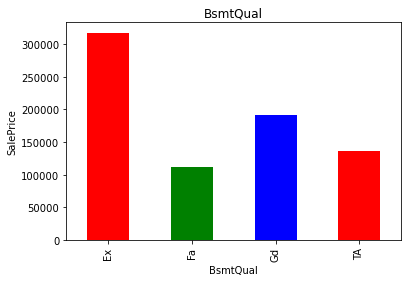

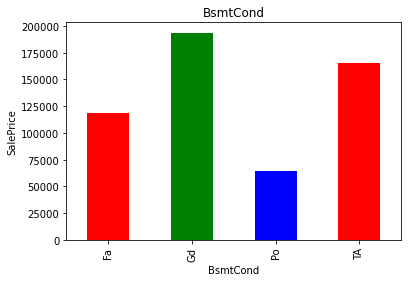

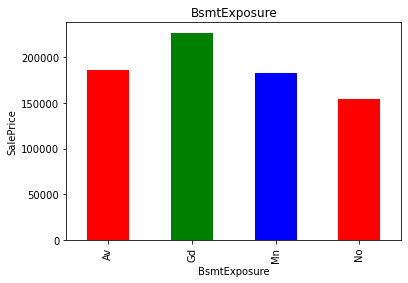

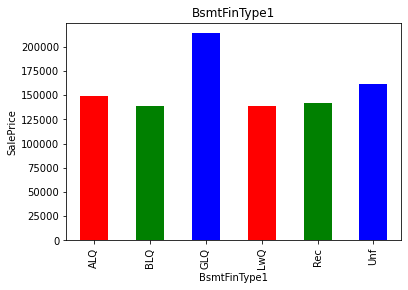

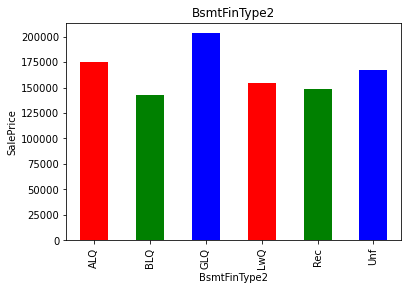

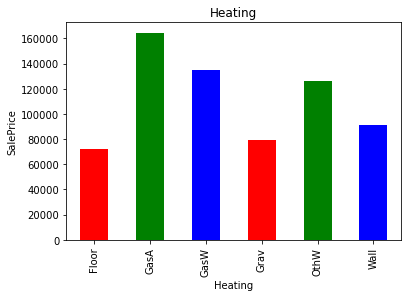

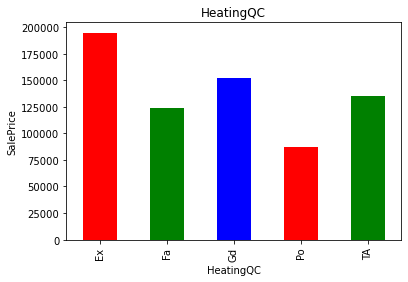

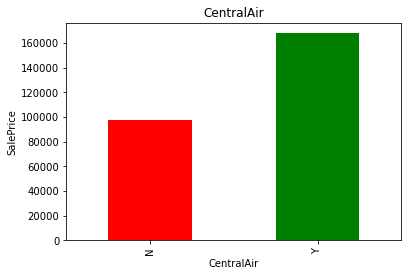

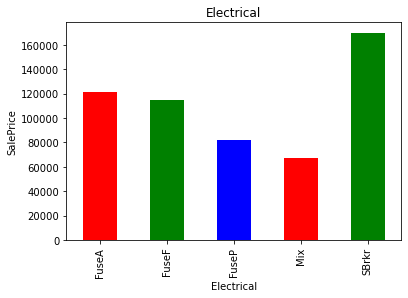

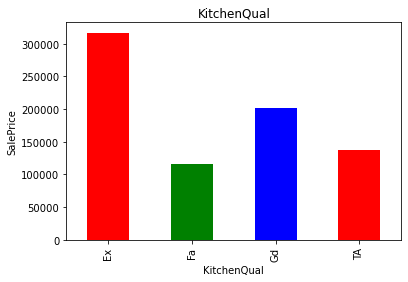

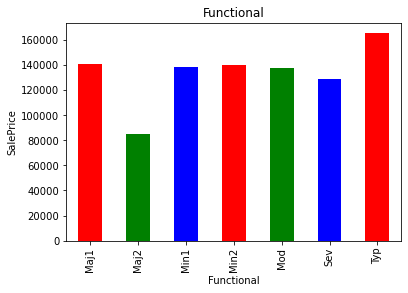

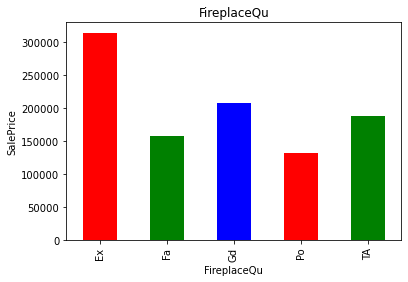

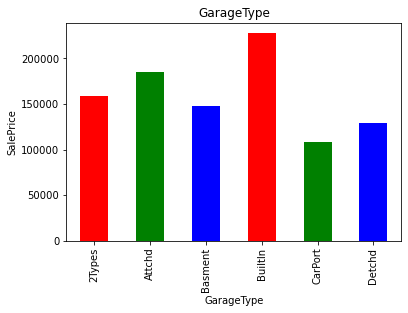

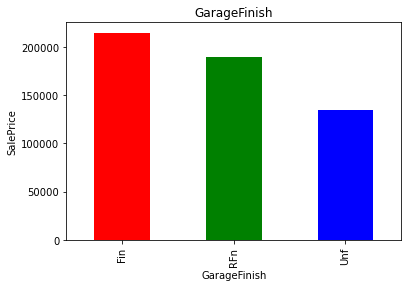

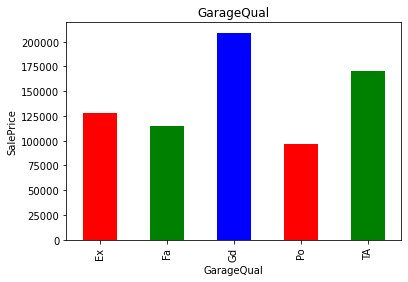

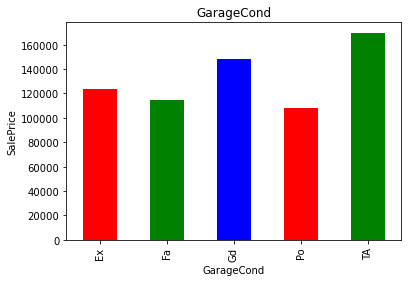

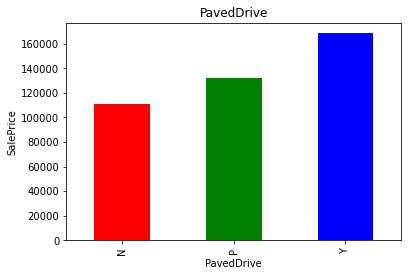

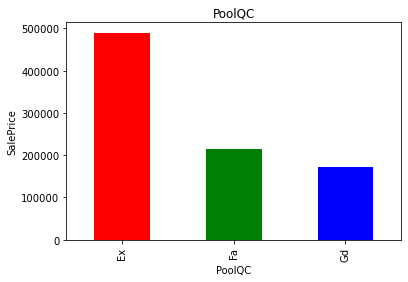

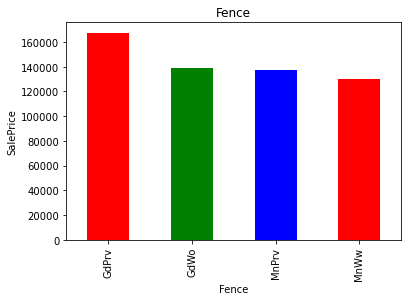

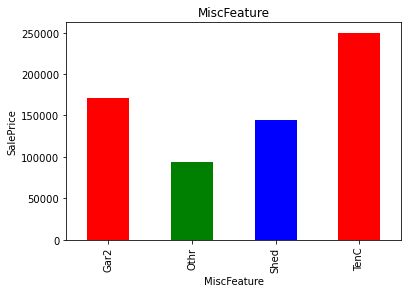

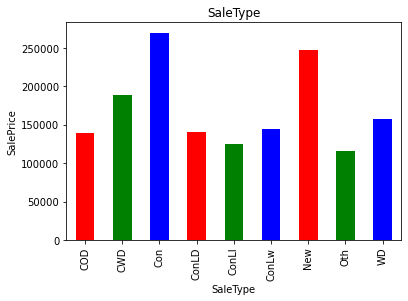

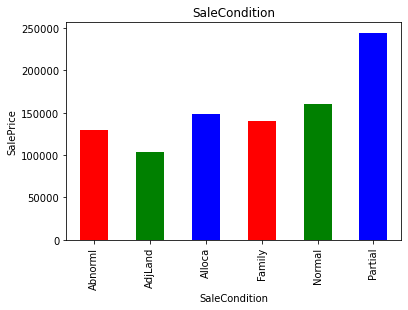

In [29]:
## Categorical Analysis
for feature in categorical:
    d=data.copy()
    d.groupby(feature)['SalePrice'].median().plot.bar(color=['r','g','b'])
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

## Data Preprocessing

#### Outliers

In [30]:
from scipy import stats
import numpy as np
for feature in continuous:
    z = np.abs(stats.zscore(data[feature]))
    print("\nOutliers in {} is at {}\n".format(feature,np.where(z > 3)))
    


Outliers in LotFrontage is at (array([], dtype=int64),)


Outliers in LotArea is at (array([  53,  249,  313,  335,  384,  451,  457,  661,  706,  769,  848,
       1298, 1396], dtype=int64),)


Outliers in MasVnrArea is at (array([], dtype=int64),)


Outliers in BsmtFinSF1 is at (array([  70,  178,  523,  898, 1182, 1298], dtype=int64),)


Outliers in BsmtFinSF2 is at (array([  24,   52,  113,  116,  153,  166,  233,  253,  260,  263,  271,
        273,  313,  322,  355,  414,  440,  446,  470,  493,  542,  548,
        577,  586,  599,  666,  697,  764,  785,  828,  842,  854,  888,
        918,  923,  924, 1040, 1059, 1077, 1152, 1220, 1253, 1299, 1308,
       1320, 1369, 1387, 1418, 1445, 1458], dtype=int64),)


Outliers in BsmtUnfSF is at (array([ 137,  224,  278,  477,  496,  581,  678,  774,  798,  932, 1267],
      dtype=int64),)


Outliers in TotalBsmtSF is at (array([ 224,  332,  440,  496,  523,  691, 1044, 1182, 1298, 1373],
      dtype=int64),)


Outliers in 1stFlrSF is a

In [31]:
for feature in continuous:
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    print("\n",feature)
    print("Q1: {} and Q2: {}".format(Q1,Q3))
    IQR = Q3-Q1
    print("IQR: {}".format(IQR))
    lower_limit = Q1 - 1.5*IQR
    upper_limit = Q3 + 1.5*IQR
    print("Lower Limit: {} and Upper Limit: {}".format(lower_limit,upper_limit))
    data[feature] = np.where(data[feature]>upper_limit,upper_limit,data[feature])
    data[feature] = np.where(data[feature]<lower_limit,lower_limit,data[feature])


 LotFrontage
Q1: 59.0 and Q2: 80.0
IQR: 21.0
Lower Limit: 27.5 and Upper Limit: 111.5

 LotArea
Q1: 7553.5 and Q2: 11601.5
IQR: 4048.0
Lower Limit: 1481.5 and Upper Limit: 17673.5

 MasVnrArea
Q1: 0.0 and Q2: 166.0
IQR: 166.0
Lower Limit: -249.0 and Upper Limit: 415.0

 BsmtFinSF1
Q1: 0.0 and Q2: 712.25
IQR: 712.25
Lower Limit: -1068.375 and Upper Limit: 1780.625

 BsmtFinSF2
Q1: 0.0 and Q2: 0.0
IQR: 0.0
Lower Limit: 0.0 and Upper Limit: 0.0

 BsmtUnfSF
Q1: 223.0 and Q2: 808.0
IQR: 585.0
Lower Limit: -654.5 and Upper Limit: 1685.5

 TotalBsmtSF
Q1: 795.75 and Q2: 1298.25
IQR: 502.5
Lower Limit: 42.0 and Upper Limit: 2052.0

 1stFlrSF
Q1: 882.0 and Q2: 1391.25
IQR: 509.25
Lower Limit: 118.125 and Upper Limit: 2155.125

 2ndFlrSF
Q1: 0.0 and Q2: 728.0
IQR: 728.0
Lower Limit: -1092.0 and Upper Limit: 1820.0

 GrLivArea
Q1: 1129.5 and Q2: 1776.75
IQR: 647.25
Lower Limit: 158.625 and Upper Limit: 2747.625

 GarageArea
Q1: 334.5 and Q2: 576.0
IQR: 241.5
Lower Limit: -27.75 and Upper Limit: 

In [32]:
for feature in continuous:
    z = np.abs(stats.zscore(data[feature]))
    print("\nOutliers in {} is at {}\n".format(feature,np.where(z > 3)))
    


Outliers in LotFrontage is at (array([], dtype=int64),)


Outliers in LotArea is at (array([], dtype=int64),)


Outliers in MasVnrArea is at (array([], dtype=int64),)


Outliers in BsmtFinSF1 is at (array([  53,   70,  178,  440,  523,  898, 1182, 1298], dtype=int64),)


Outliers in BsmtFinSF2 is at (array([], dtype=int64),)


Outliers in BsmtUnfSF is at (array([], dtype=int64),)


Outliers in TotalBsmtSF is at (array([], dtype=int64),)


Outliers in 1stFlrSF is at (array([], dtype=int64),)


Outliers in 2ndFlrSF is at (array([ 304,  691, 1169, 1182], dtype=int64),)


Outliers in GrLivArea is at (array([], dtype=int64),)


Outliers in GarageArea is at (array([], dtype=int64),)


Outliers in WoodDeckSF is at (array([], dtype=int64),)


Outliers in OpenPorchSF is at (array([], dtype=int64),)


Outliers in EnclosedPorch is at (array([], dtype=int64),)


Outliers in ScreenPorch is at (array([], dtype=int64),)


Outliers in SalePrice is at (array([], dtype=int64),)



#### According to the IQR method after treating the outliers EnclosedPorch,ScreenPorch and BsmtFinSF2 their values are 0,we can drop these columns.

#### Handle Missing Values

In [33]:

data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [34]:
Con_missing=[feature for feature in continuous if data[feature].isnull().sum()>0]
Cat_missing=[feature for feature in categorical if data[feature].isnull().sum()>0] 
Dis_missing=[feature for feature in discrete if data[feature].isnull().sum()>0] 
Yr_missing=[feature for feature in year_feature if data[feature].isnull().sum()>0] 


In [35]:
print(Con_missing)
print(len(Con_missing)," Continuous data has missing values ")

['LotFrontage', 'MasVnrArea']
2  Continuous data has missing values 


In [36]:
Cat_missing
print(len(Cat_missing)," Categorical data has missing values ")

16  Categorical data has missing values 


In [37]:
Dis_missing
print(len(Dis_missing)," Discrete data has missing values ")

0  Discrete data has missing values 


In [38]:
print(Yr_missing)
print(len(Yr_missing)," Year data has missing values ")

['GarageYrBlt']
1  Year data has missing values 


In [39]:
data['LotFrontage'].fillna(data['LotFrontage'].median(),inplace=True)

In [40]:
data['LotFrontage'].isnull().sum()

0

In [41]:
data['MasVnrArea'].isnull().sum()

8

In [42]:
data['MasVnrArea'].fillna(data['MasVnrArea'].median(),inplace=True)

In [43]:

data['MasVnrArea'].isnull().sum()

0

In [44]:
data['GarageYrBlt'].isnull().sum()

81

In [45]:
data['GarageYrBlt'].fillna(data['GarageYrBlt'].median(),inplace=True)

In [46]:
data['GarageYrBlt'].isnull().sum()

0

In [47]:
features_nan=[feature for feature in data.columns if data[feature].isnull().sum()>1 and data[feature].dtypes=='O']
def replace_cat_feature(data,features_nan):

    data[features_nan]=data[features_nan].fillna('Missing')
    return data

data=replace_cat_feature(data,features_nan)


#### Converting Categorical to numerical

In [48]:
## Converting Year Feature to numerical
for feature in ['YearBuilt','YearRemodAdd','GarageYrBlt']:
    data[feature]=data['YrSold']-data[feature]

In [49]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450.0,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856.0,854.0,0,1710.0,1,0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,5.0,RFn,2,548.0,TA,TA,Y,0.0,61.0,0.0,0,0.0,0,Missing,Missing,Missing,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600.0,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,31,31,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262.0,0.0,0,1262.0,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,31.0,RFn,2,460.0,TA,TA,Y,298.0,0.0,0.0,0,0.0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250.0,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,7,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920.0,866.0,0,1786.0,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,7.0,RFn,2,608.0,TA,TA,Y,0.0,42.0,0.0,0,0.0,0,Missing,Missing,Missing,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550.0,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,91,36,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961.0,756.0,0,1717.0,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,8.0,Unf,3,642.0,TA,TA,Y,0.0,35.0,0.0,0,0.0,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260.0,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,8,8,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145.0,1053.0,0,2198.0,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,8.0,RFn,3,836.0,TA,TA,Y,192.0,84.0,0.0,0,0.0,0,Missing,Missing,Missing,0,12,2008,WD,Normal,250000.0


#### Numerical Features Transformation as Skewness present

In [50]:
## Select features without 0 value
features=[feature for feature in numerical if data[feature].all()!=0]

In [51]:
Cfeatures=features[1:]

In [52]:
data.drop(['Id'],axis=1,inplace=True)

In [53]:
features=[feature for feature in Cfeatures if data[feature].all()!=0]

In [54]:
features

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'TotRmsAbvGrd',
 'MoSold',
 'YrSold',
 'SalePrice']

In [55]:
for feature in features:
    data[feature]=np.log(data[feature])

In [56]:
data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,4.094345,RL,4.174387,9.041922,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,1.945910,1.609438,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,6.752270,GasA,Ex,Y,SBrkr,6.752270,854.0,0,7.444249,1,0,2,1,3,1,Gd,2.079442,Typ,0,Missing,Attchd,5.0,RFn,2,548.0,TA,TA,Y,0.0,61.0,0.0,0,0.0,0,Missing,Missing,Missing,0,0.693147,7.604894,WD,Normal,12.247694
1,2.995732,RL,4.382027,9.169518,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,1.791759,2.079442,31,31,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,7.140453,GasA,Ex,Y,SBrkr,7.140453,0.0,0,7.140453,0,1,2,0,3,1,TA,1.791759,Typ,1,TA,Attchd,31.0,RFn,2,460.0,TA,TA,Y,298.0,0.0,0.0,0,0.0,0,Missing,Missing,Missing,0,1.609438,7.604396,WD,Normal,12.109011
2,4.094345,RL,4.219508,9.328123,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,1.945910,1.609438,7,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,6.824374,GasA,Ex,Y,SBrkr,6.824374,866.0,0,7.487734,1,0,2,1,3,1,Gd,1.791759,Typ,1,TA,Attchd,7.0,RFn,2,608.0,TA,TA,Y,0.0,42.0,0.0,0,0.0,0,Missing,Missing,Missing,0,2.197225,7.604894,WD,Normal,12.317167
3,4.248495,RL,4.094345,9.164296,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,1.945910,1.609438,91,36,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,6.628041,GasA,Gd,Y,SBrkr,6.867974,756.0,0,7.448334,1,0,1,0,3,1,Gd,1.945910,Typ,1,Gd,Detchd,8.0,Unf,3,642.0,TA,TA,Y,0.0,35.0,0.0,0,0.0,0,Missing,Missing,Missing,0,0.693147,7.603898,WD,Abnorml,11.849398
4,4.094345,RL,4.430817,9.565214,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,2.079442,1.609438,8,8,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,7.043160,GasA,Ex,Y,SBrkr,7.043160,1053.0,0,7.695303,1,0,2,1,4,1,Gd,2.197225,Typ,1,TA,Attchd,8.0,RFn,3,836.0,TA,TA,Y,192.0,84.0,0.0,0,0.0,0,Missing,Missing,Missing,0,2.484907,7.604894,WD,Normal,12.429216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,4.094345,RL,4.127134,8.976768,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,1.791759,1.609438,8,7,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,953.0,6.859615,GasA,Ex,Y,SBrkr,6.859615,694.0,0,7.406711,0,0,2,1,3,1,TA,1.945910,Typ,1,TA,Attchd,8.0,RFn,2,460.0,TA,TA,Y,0.0,40.0,0.0,0,0.0,0,Missing,Missing,Missing,0,2.079442,7.604396,WD,Normal,12.072541
1456,2.995732,RL,4.442651,9.486076,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,1.791759,1.791759,32,22,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790.0,Rec,0.0,589.0,7.340836,GasA,TA,Y,SBrkr,7.636752,0.0,0,7.636752,1,0,2,0,3,1,TA,1.945910,Min1,2,TA,Attchd,32.0,Unf,2,500.0,TA,TA,Y,349.0,0.0,0.0,0,0.0,0,Mis

In [57]:
for feature in categorical:
    temp=data.groupby(feature)['SalePrice'].count()/len(data)
    temp_df=temp[temp>0.01].index
    data[feature]=np.where(data[feature].isin(temp_df),data[feature],'Rare_Value')
    

#### Converting Categorial to Numerical

In [58]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
for feature in categorical:
    data[feature]=label.fit_transform(data[feature])

In [59]:
data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,4.094345,2,4.174387,9.041922,0,1,3,3,0,3,0,4,2,0,0,2,1.945910,1.609438,5,5,0,0,8,8,1,196.0,1,3,2,2,4,4,2,706.0,6,0.0,150.0,6.752270,0,0,1,3,6.752270,854.0,0,7.444249,1,0,2,1,3,1,2,2.079442,4,0,3,0,5.0,2,2,548.0,3,3,2,0.0,61.0,0.0,0,0.0,0,0,2,0,0,0.693147,7.604894,3,2,12.247694
1,2.995732,2,4.382027,9.169518,0,1,3,3,0,2,0,16,1,0,0,1,1.791759,2.079442,31,31,0,0,4,4,2,0.0,3,3,1,2,4,1,0,978.0,6,0.0,284.0,7.140453,0,0,1,3,7.140453,0.0,0,7.140453,0,1,2,0,3,1,3,1.791759,4,1,5,0,31.0,2,2,460.0,3,3,2,298.0,0.0,0.0,0,0.0,0,0,2,0,0,1.609438,7.604396,3,2,12.109011
2,4.094345,2,4.219508,9.328123,0,1,0,3,0,3,0,4,2,0,0,2,1.945910,1.609438,7,6,0,0,8,8,1,162.0,1,3,2,2,4,3,2,486.0,6,0.0,434.0,6.824374,0,0,1,3,6.824374,866.0,0,7.487734,1,0,2,1,3,1,2,1.791759,4,1,5,0,7.0,2,2,608.0,3,3,2,0.0,42.0,0.0,0,0.0,0,0,2,0,0,2.197225,7.604894,3,2,12.317167
3,4.248495,2,4.094345,9.164296,0,1,0,3,0,0,0,5,2,0,0,2,1.945910,1.609438,91,36,0,0,9,10,2,0.0,3,3,0,4,1,4,0,216.0,6,0.0,540.0,6.628041,0,2,1,3,6.867974,756.0,0,7.448334,1,0,1,0,3,1,2,1.945910,4,1,2,3,8.0,3,3,642.0,3,3,2,0.0,35.0,0.0,0,0.0,0,0,2,0,0,0.693147,7.603898,3,0,11.849398
4,4.094345,2,4.430817,9.565214,0,1,0,3,0,2,0,13,2,0,0,2,2.079442,1.609438,8,8,0,0,8,8,1,350.0,1,3,2,2,4,0,2,655.0,6,0.0,490.0,7.043160,0,0,1,3,7.043160,1053.0,0,7.695303,1,0,2,1,4,1,2,2.197225,4,1,5,0,8.0,2,3,836.0,3,3,2,192.0,84.0,0.0,0,0.0,0,0,2,0,0,2.484907,7.604894,3,2,12.429216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,4.094345,2,4.127134,8.976768,0,1,3,3,0,3,0,7,2,0,0,2,1.791759,1.609438,8,7,0,0,8,8,2,0.0,3,3,2,2,4,4,6,0.0,6,0.0,953.0,6.859615,0,0,1,3,6.859615,694.0,0,7.406711,0,0,2,1,3,1,3,1.945910,4,1,5,0,8.0,2,2,460.0,3,3,2,0.0,40.0,0.0,0,0.0,0,0,2,0,0,2.079442,7.604396,3,2,12.072541
1456,2.995732,2,4.442651,9.486076,0,1,3,3,0,3,0,12,2,0,0,1,1.791759,1.791759,32,22,0,0,5,5,4,119.0,3,3,1,2,4,4,0,790.0,5,0.0,589.0,7.340836,0,4,1,3,7.636752,0.0,0,7.636752,1,0,2,0,3,1,3,1.945910,0,2,5,0,32.0,3,2,500.0,3,3,2,349.0,0.0,0.0,0,0.0,0,0,3,0,0,0.693147,7.605890,3,2,12.254863
1457,4.248495,2,4.189655,9.109636,0,1,3,3,0,3,0,5,2,0,0,2,1.945910,2.197225,69,4,0,0,2,2,2,0.0,0,1,3,4,1,4,2,275.0,6,0.0,877.0,7.049255,0,0,1,3,7.080026,1152.0,0,7.757906,0,0,2,0,4,1,2,2.197225,4,2,2,0,69.0,2,1,252.0,3,3,2,0.0,60.0,0.0,0,0.0,0,0,0,2,2500,1.609438,7.605890,3,2,12.493130
1458,2.995732,2,4.219508,9.181632,0,1,3,3,0,3,0,11,2,0,0,1,1.609438,1.791759,60,14,1,0,4,4,2,0.0,3,3,1,4,4,3,2,49.0,5,0.0,0.0,6.982863,0,2,1,0,6.982863,0.0,0,6.982863,1,0,1,0,2,1,2,1.609438,4,0,3,0,60.0,3,1,240.0,3,3,2,366.0,0.0,0.0,0,0.0,0,0,2,0,0,1.386294,7.605890,3,2,11.864462


#### Scaling

In [60]:
feature_scaler=[feature for feature in data.columns if feature not in ['SalePrice']]
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(data[feature_scaler])

MinMaxScaler()

In [61]:
## Transforming the Scaled features
final_data=pd.concat([data[['SalePrice']].reset_index(drop=True),pd.DataFrame(scaler.transform(data[feature_scaler]),columns=feature_scaler)],axis=1)

In [62]:
final_data

,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,12.247694,0.487992,0.5,0.614500,0.702341,0.0,0.5,1.0,1.0,0.0,0.75,0.0,0.181818,0.4,0.0,0.0,0.4,0.845098,0.732487,0.036765,0.098361,0.0,0.0,0.8,0.8,0.25,0.472289,0.333333,1.000000,0.50,0.5,1.00,1.00,0.333333,0.396490,1.000000,0.0,0.088994,0.775181,0.0,0.0,1.0,1.0,0.504772,0.469231,0.0,0.774958,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.712414,1.0,0.000000,0.6,0.0,0.046729,0.666667,0.50,0.584066,1.0,1.0,1.0,0.000000,0.358824,0.0,0.0,0.0,0.0,0.0,0.50,0.0,0.00000,0.278943,0.500249,1.0,0.5
1,12.109011,0.000000,0.5,0.762831,0.753812,0.0,0.5,1.0,1.0,0.0,0.50,0.0,0.727273,0.2,0.0,0.0,0.2,0.778151,0.946395,0.227941,0.524590,0.0,0.0,0.4,0.4,0.50,0.000000,1.000000,1.000000,0.25,0.5,1.00,0.25,0.000000,0.549245,1.000000,0.0,0.168496,0.874999,0.0,0.0,1.0,1.0,0.712973,0.000000,0.0,0.630798,0.000000,0.5,0.666667,0.0,0.375,0.333333,1.000000,0.564575,1.0,0.333333,1.0,0.0,0.289720,0.666667,0.50,0.490274,1.0,1.0,1.0,0.709524,0.000000,0.0,0.0,0.0,0.0,0.0,0.50,0.0,0.00000,0.647685,0.250187,1.0,0.5
2,12.317167,0.487992,0.5,0.646733,0.817791,0.0,0.5,0.0,1.0,0.0,0.75,0.0,0.181818,0.4,0.0,0.0,0.4,0.845098,0.732487,0.051471,0.114754,0.0,0.0,0.8,0.8,0.25,0.390361,0.333333,1.000000,0.50,0.5,1.00,0.75,0.333333,0.272938,1.000000,0.0,0.257490,0.793722,0.0,0.0,1.0,1.0,0.543445,0.475824,0.0,0.795592,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.564575,1.0,0.333333,1.0,0.0,0.065421,0.666667,0.50,0.648015,1.0,1.0,1.0,0.000000,0.247059,0.0,0.0,0.0,0.0,0.0,0.50,0.0,0.00000,0.884228,0.500249,1.0,0.5
3,11.849398,0.556464,0.5,0.557320,0.751705,0.0,0.5,0.0,1.0,0.0,0.00,0.0,0.227273,0.4,0.0,0.0,0.4,0.845098,0.732487,0.669118,0.606557,0.0,0.0,0.9,1.0,0.50,0.000000,1.000000,1.000000,0.00,1.0,0.25,1.00,0.000000,0.121306,1.000000,0.0,0.320380,0.743236,0.0,0.5,1.0,1.0,0.566830,0.415385,0.0,0.776896,0.333333,0.0,0.333333,0.0,0.375,0.333333,0.666667,0.643793,1.0,0.333333,0.4,0.6,0.074766,1.000000,0.75,0.684253,1.0,1.0,1.0,0.000000,0.205882,0.0,0.0,0.0,0.0,0.0,0.50,0.0,0.00000,0.278943,0.000000,1.0,0.0
4,12.429216,0.487992,0.5,0.797685,0.913430,0.0,0.5,0.0,1.0,0.0,0.50,0.0,0.590909,0.4,0.0,0.0,0.4,0.903090,0.732487,0.058824,0.147541,0.0,0.0,0.8,0.8,0.25,0.843373,0.333333,1.000000,0.50,0.5,1.00,0.00,0.333333,0.367848,1.000000,0.0,0.290715,0.849981,0.0,0.0,1.0,1.0,0.660790,0.578571,0.0,0.894090,0.333333,0.0,0.666667,0.5,0.500,0.333333,0.666667,0.772943,1.0,0.333333,1.0,0.0,0.074766,0.666667,0.75,0.891021,1.0,1.0,1.0,0.457143,0.494118,0.0,0.0,0.0,0.0,0.0,0.50,0.0,0.00000,1.000000,0.500249,1.0,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,12.072541,0.487992,0.5,0.580744,0.676059,0.0,0.5,1.0,1.0,0.0,0.75,0.0,0.318182,0.4,0.0,0.0,0.4,0.778151,0.732487,0.058824,0.131148,0.0,0.0,0.8,0.8,0.50,0.000000,1.000000,1.000000,0.50,0.5,1.00,1.00,1.000000,0.000000,1.000000,0.0,0.565411,0.802784,0.0,0.0,1.0,1.0,0.562346,0.381319,0.0,0.757145,0.000000,0.0,0.6666

#### Feature Selection

In [63]:
correlation=data.corr()
correlation.style.background_gradient()

### *Observations from the above Analysis
#### 1.Since there were more outilers in ScreenPorch,EnclosedPorch and BsmtFinSF2 ,they were treated with the IQR method hence the Nan value in the above analysis.

In [64]:
## Correlation with Respect to SalePrice
for feature in data.columns[1:]:
    cor=data[feature].corr(data['SalePrice'])
    print(feature,cor)
    if cor<0:
        data.drop(feature,axis=1,inplace=True)
    


MSZoning -0.34333880797140953
LotFrontage 0.34823874298055696
LotArea 0.3986293992244094
Street -0.05892922427185097
Alley 0.11822527273786083
LotShape -0.28049531831870494
LandContour 0.03490395241051157
Utilities -0.012700558266485489
LotConfig -0.0632017520107774
LandSlope 0.039397707652771834
Neighborhood 0.18098235326415413
Condition1 0.14723554076501444
Condition2 -0.04762170165968376
BldgType -0.06831078913636074
HouseStyle 0.09668300015459944
OverallQual 0.7958212861010966
OverallCond 0.015883872582401364
YearBuilt -0.5972086295936263
YearRemodAdd -0.5775231477501476
RoofStyle 0.14876934859187105
RoofMatl 0.08058820796067685
Exterior1st 0.1129610013737733
Exterior2nd 0.1131270678673167
MasVnrType 0.08964838672164295
MasVnrArea 0.4184325987040565
ExterQual -0.6406593653988669
ExterCond 0.159931792654858
Foundation 0.37782808133295276
BsmtQual -0.5664504723551235
BsmtCond 0.1246206017982062
BsmtExposure -0.24016183046164952
BsmtFinType1 -0.126719249587766
BsmtFinSF1 0.37234352566

In [65]:
## Checking for multi-correlation
for feature in data.columns[1:]:
    for features in data.columns[1:]:
        cor=data[feature].corr(data[features])
        if cor>0.6 and cor!=1 and feature!=features:
            print(feature,cor,features)

            
            
        

LotFrontage 0.6927931733489245 LotArea
LotArea 0.6927931733489244 LotFrontage
OverallQual 0.6002049195881456 GrLivArea
OverallQual 0.7958212861010966 SalePrice
Exterior1st 0.8773229385569081 Exterior2nd
Exterior2nd 0.877322938556908 Exterior1st
BsmtFinSF1 0.6623116067039199 BsmtFullBath
1stFlrSF 0.6040675235923707 SalePrice
2ndFlrSF 0.6546367296333414 GrLivArea
2ndFlrSF 0.6101649386827089 HalfBath
GrLivArea 0.6002049195881456 OverallQual
GrLivArea 0.6546367296333414 2ndFlrSF
GrLivArea 0.6503054952840861 FullBath
GrLivArea 0.8268918734305566 TotRmsAbvGrd
GrLivArea 0.7318731257291411 SalePrice
BsmtFullBath 0.6623116067039198 BsmtFinSF1
FullBath 0.650305495284086 GrLivArea
HalfBath 0.6101649386827089 2ndFlrSF
BedroomAbvGr 0.6829543449374916 TotRmsAbvGrd
TotRmsAbvGrd 0.8268918734305566 GrLivArea
TotRmsAbvGrd 0.6829543449374915 BedroomAbvGr
GarageCars 0.8927543469243755 GarageArea
GarageCars 0.6804991336319047 SalePrice
GarageArea 0.8927543469243755 GarageCars
GarageArea 0.6601439800705573 

In [66]:
## after Treating Outliers
final_data.drop(['EnclosedPorch','ScreenPorch','BsmtFinSF2'],axis=1,inplace=True)

#### Model Creation

In [67]:
#Step 1 Independent and dependent variable creation
X=final_data[['MSZoning', 'LotFrontage', 'LotArea', 'LotShape', 'Neighborhood',
       'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'ExterQual',
       'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinSF1', 'BsmtUnfSF',
       'TotalBsmtSF', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'SaleCondition']] ## X variable contains all inputs
y=final_data['SalePrice']## y is output

In [68]:
X.shape

(1460, 40)

In [69]:
# Step 2 Traning and testing data creation
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [70]:
print("X: {}\n X_train: {}\n X_test: {}\n".format(X.shape,X_train.shape,X_test.shape))

X: (1460, 40)
 X_train: (1168, 40)
 X_test: (292, 40)



### Feature Importances

In [71]:
from sklearn.feature_selection import mutual_info_regression
mutual_info=mutual_info_regression(X,y)
mutual_info

array([0.12804187, 0.20065277, 0.1837043 , 0.08678686, 0.48360896,
       0.55946455, 0.33481868, 0.24978289, 0.10047398, 0.3292834 ,
       0.19279891, 0.3344863 , 0.07052178, 0.14529932, 0.12831458,
       0.3308829 , 0.15869699, 0.06984474, 0.04850469, 0.2947988 ,
       0.19526259, 0.45907696, 0.02307276, 0.26573013, 0.08581726,
       0.06736806, 0.33061746, 0.21248749, 0.16042361, 0.19393547,
       0.24748293, 0.25910931, 0.36213105, 0.36512529, 0.07153395,
       0.08033822, 0.05520277, 0.10352397, 0.14901713, 0.06693439])

In [72]:
pd.set_option('display.max_rows',None)
mutual_info=pd.Series(mutual_info)
mutual_info.index=X.columns
mutual_info.sort_values(ascending=False)

OverallQual      0.559465
Neighborhood     0.483609
GrLivArea        0.459077
GarageArea       0.365125
GarageCars       0.362131
YearBuilt        0.334819
BsmtQual         0.334486
TotalBsmtSF      0.330883
KitchenQual      0.330617
ExterQual        0.329283
1stFlrSF         0.294799
FullBath         0.265730
GarageFinish     0.259109
YearRemodAdd     0.249783
GarageYrBlt      0.247483
TotRmsAbvGrd     0.212487
LotFrontage      0.200653
2ndFlrSF         0.195263
GarageType       0.193935
Foundation       0.192799
LotArea          0.183704
Fireplaces       0.160424
HeatingQC        0.158697
OpenPorchSF      0.149017
BsmtFinSF1       0.145299
BsmtUnfSF        0.128315
MSZoning         0.128042
WoodDeckSF       0.103524
MasVnrArea       0.100474
LotShape         0.086787
HalfBath         0.085817
GarageCond       0.080338
GarageQual       0.071534
BsmtExposure     0.070522
CentralAir       0.069845
BedroomAbvGr     0.067368
SaleCondition    0.066934
PavedDrive       0.055203
Electrical  

<AxesSubplot:>

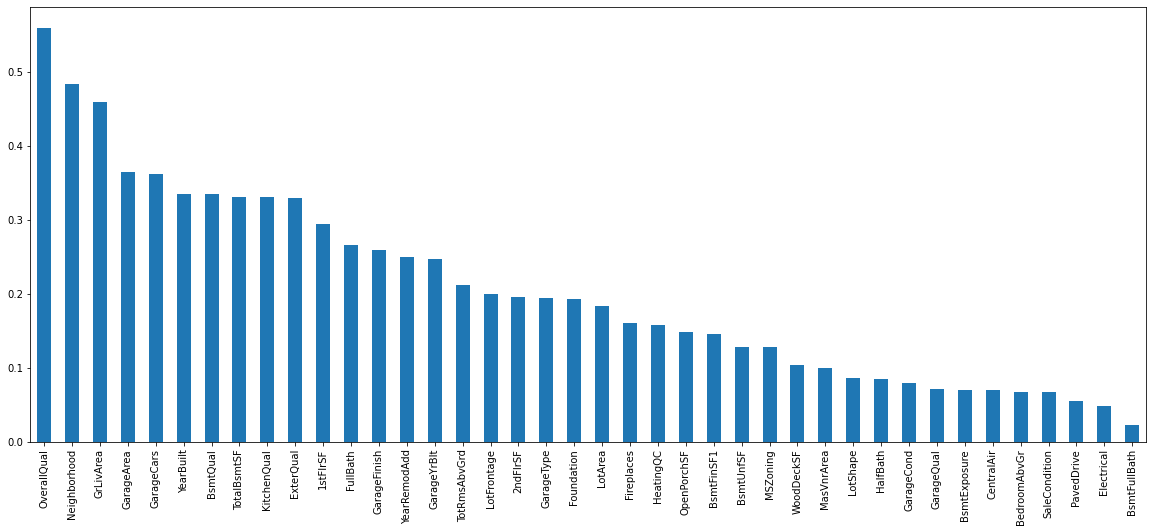

In [73]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20,8))

In [74]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from numpy import array

skb=SelectKBest(score_func=f_regression,k=40)
z=skb.fit_transform(X,y)
filter=skb.get_support()
print(X.columns[filter])

Index(['MSZoning', 'LotFrontage', 'LotArea', 'LotShape', 'Neighborhood',
       'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'ExterQual',
       'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinSF1', 'BsmtUnfSF',
       'TotalBsmtSF', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'SaleCondition'],
      dtype='object')


#### Linear Regression

Model Score 0.900350773458962
R2score:0.8477944172829543
MAE:0.09403808820368247


<function matplotlib.pyplot.show(close=None, block=None)>

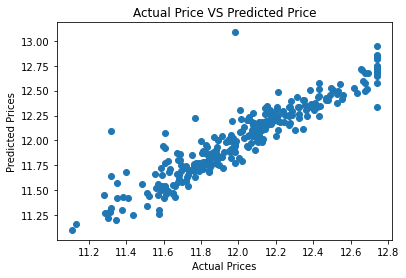

In [75]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression() # object creation
LR.fit(X_train,y_train) # training of linear regression
y_predict=LR.predict(X_test)

## Evaluation
r2score=metrics.r2_score(y_test,y_predict)
MAE=metrics.mean_absolute_error(y_test,y_predict)
print("Model Score",LR.score(X_train,y_train))
print("R2score:{}\nMAE:{}".format(r2score,MAE))



## Visualzing
plt.scatter(y_test,y_predict)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price VS Predicted Price")
plt.show

#### Random Forest Regressor

Model Score 0.9812115362441725
R2score:0.8736092079382793
MAE:0.08932500731575711


<function matplotlib.pyplot.show(close=None, block=None)>

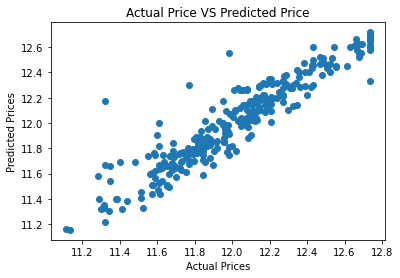

In [76]:
from sklearn.ensemble import RandomForestRegressor

# Fit Random Forest on Training Set
RForest = RandomForestRegressor(n_estimators=100,n_jobs=1 , random_state=0)
RForest.fit(X_train, y_train)
y_predict=RForest.predict(X_test)

## Evaluation
r2score=metrics.r2_score(y_test,y_predict)
MAE=metrics.mean_absolute_error(y_test,y_predict)
print("Model Score",RForest.score(X_train,y_train))
print("R2score:{}\nMAE:{}".format(r2score,MAE))



## Visualzing
plt.scatter(y_test,y_predict)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price VS Predicted Price")
plt.show

#### SVM – Support vector Machine

Model Score 0.9458882657450304
R2score:0.8616276018451889
MAE:0.0967756515556306


<function matplotlib.pyplot.show(close=None, block=None)>

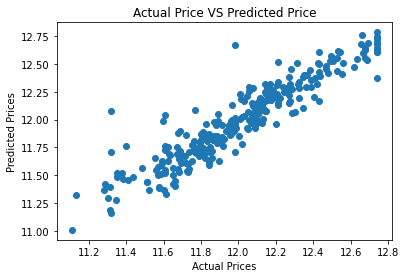

In [77]:
from sklearn import svm
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_percentage_error
 
model_SVR = svm.SVR()
model_SVR.fit(X_train, y_train)
y_predict=model_SVR.predict(X_test)

## Evaluation
r2score=metrics.r2_score(y_test,y_predict)
MAE=metrics.mean_absolute_error(y_test,y_predict)
print("Model Score",model_SVR.score(X_train,y_train))
print("R2score:{}\nMAE:{}".format(r2score,MAE))



## Visualzing
plt.scatter(y_test,y_predict)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price VS Predicted Price")
plt.show

#### GRadient Boosting Regressor

Model Score 0.9399360277700383
R2score:0.8815177204370368
MAE:0.08527579713793791


<function matplotlib.pyplot.show(close=None, block=None)>

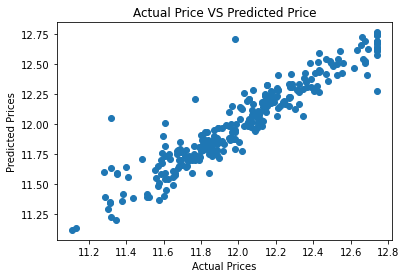

In [78]:
from sklearn.ensemble import GradientBoostingRegressor

# Fit Gradient Boosting on Training Set
GBoost = GradientBoostingRegressor(n_estimators=100, learning_rate=0.05,
                                   max_depth=5, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state=0)
GBoost.fit(X_train, y_train)
y_predict=GBoost.predict(X_test)

## Evaluation
r2score=metrics.r2_score(y_test,y_predict)
MAE=metrics.mean_absolute_error(y_test,y_predict)
print("Model Score",GBoost.score(X_train,y_train))
print("R2score:{}\nMAE:{}".format(r2score,MAE))


## Visualzing
plt.scatter(y_test,y_predict)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price VS Predicted Price")
plt.show

### *Observation from the above analysis
#### Gradient Boosting is having less Mean Absolute Error,so it the best model compared to other models

## Report on House Price Prediction

  In this project, we have conducted a detailed EDA to understand the data and important features. Based on exploratory analysis, we performed data preprocessing and feature engineering. Finally, we trained the dat with linear regression, Random Forest Regressor, Support Vector Machine and XGBoost , and take average predictions from these models to predict final price of each house. By the time we write this notebook, our best model has Mean Absolute Error of 0.08527579713793791 which is Gradient Boosting model.
  
  
 So Gradient boosting model is best model used for this project.

  From the above data we can say that the customer can buy house based on location of house,size of lot,number of bedrooms,number of bathrooms,year of housebuilt,Overallquality, Neighbourhood and the Sale Price.

## Model Comparission Report

###   Linear Regression:


 The main aim of Linear Regression model is to find the best fit linear line and the optimal values of intercept and coefficients such that the error is minimized. Error is defined as the difference between the actual value and Predicted value. The goal is to reduce this error or difference. Linear Regression is of two types based on number of independent variables: Simple and Multiple. Simple Linear Regression contains only one independent variable and the model has to find the linear relationship between this and the dependent variable. Whereas, Multiple Linear Regression contains more than one independent variables for the model to find the relationship with the dependent variable.
        
        
Model Score 0.900350773458962


R2score:0.8477944172829543
    
    
MAE:0.09403808820368247

###  Support Vector Regression:

 Support Vector Regression (SVR) uses the same method as Support Vector Machine (SVM) but for regression problems. In SVR, the straight line that is required to fit the data is referred to as hyperplane. The objective of a SVR algorithm is to find a hyperplane in an n-dimensional space that classifies the data points. The data points on either side of the hyperplane that are closest to the hyperplane which are called Support Vectors.
    
    
    Model Score 0.9458882657450304
    
    
    R2score:0.8616276018451889
        
        
    MAE:0.0967756515556306     

### Random Forest Regression
 Random Forest is a classifier that contains a number of decision trees on various subsets of the given dataset and takes the average to improve the predictive accuracy of that dataset.Instead of relying on one decision tree, the random forest takes the prediction from each tree and based on the majority votes of predictions, and it predicts the final output.The greater number of trees in the forest leads to higher accuracy and prevents the problem of overfitting.
    
    
         Model Score 0.9812115362441725
        
        
         R2score:0.8736092079382793
                
                
         MAE:0.08932500731575711   

### Gradient Boost Regression
 Gradient boosting Regression calculates the difference between the current prediction and the known correct target value. This difference is called residual. After that Gradient boosting Regression trains a weak model that maps features to that residual.
    
    
Model Score 0.9399360277700383


R2score:0.8815177204370368
    
    
MAE:0.08527579713793791

### Gradient Boosting is having less Mean Absolute Error,so it the best model compared to other models

## Report on Challenges Faced

FEATURE ENGINERRING
1.Handling the Outliers:
The outliers were detected using Boxplot and the with z-score the postions of the outliers were analysied.The Outliers were then treated with the IQR method to its upper bound and lower bound.



2.Handling missing values:
The null values in numerical features were replaced with their respective median value using fillna method and in case of categorical features the Nan values were first labeled with a label and then with the LabelEncoder method is converted to numerical values.


3.Transformation:
As there is skewness and kurtosis present in many continuous features transformation is performed using Log transformation with features without 0 as a value in it as it will lead to infinity.



4.Scaling
Here MinMaxScaler() is used for scaling and then the data is transformed uing scaler.transform method is used to transform the data ready for Model Building.



5.Feature Selection
Feature selection is done using corr(),Feature importance is analysied using information gain technique and SelectKBest is used to select important features.



MODEL BULIDING,EVALUATION AND COMPARISION
Here first Independent and Dependent features are assigned and then train_test_split is used to split the data.
Then each algorithm's Objects are created and the train variables are fit and trained.The predict variable is assigned and then Evalution is performed for each algorithms using metrics,and the relation between actual values and the perdicted values is visualized using Scatter Plot.